Packages

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tqdm import tqdm

Generating a List of Cows

In [35]:
class Cow:
    def __init__(self, number, name, walk_speed, eagerness, luck):
        self.number = number
        self.name = name
        self.walk_speed = walk_speed
        self.eagerness = eagerness
        self.luck = luck
        self.position = None

    def calculate_starting_position(self, paddock_width, paddock_height):
        eagerness_norm = self.eagerness / 100
        luck_norm = self.luck / 100

        x = random.randint(0, paddock_width - 1)
        y = paddock_height/(np.exp(((eagerness_norm + luck_norm)**2.5)/2))

        return int(x), max(0, min(int(y), paddock_height - 1))
    
    def move_towards(self, target, paddock_width, paddock_height):
        x, y = self.position
        target_x, target_y = target

        move_step = 2 ** (self.walk_speed / 100)

        # Determine movement in x direction    
        if x < target_x:
            x += move_step
        elif x > target_x:
            x -= move_step

        # Determine movement in y direction
        if y < target_y:
            y += move_step
        elif y > target_y:
            y -= move_step 
        

            
        # Ensure the new position is within paddock bounds
        x = max(0, min(x, paddock_width - 1))
        y = max(0, min(y, paddock_height - 1))

        self.position = (int(x), int(y))  # Update position

In [3]:
def create_random_cow(number, name):
    walk_speed = np.random.normal(loc=60, scale=10)  # Mean: 50, Standard Deviation: 15
    eagerness = np.random.normal(loc=60, scale=6)
    luck = np.random.normal(loc=50, scale=30)
    
    # Clip values to ensure they are within the range [0, 100]
    walk_speed = np.clip(walk_speed, 0, 100)
    eagerness = np.clip(eagerness, 0, 100)
    luck = np.clip(luck, 0, 100)
        
    return Cow(number, name, walk_speed, eagerness, luck)


In [4]:
def save_cows_to_file(herd, filename):
    with open(filename, "w") as file:
        for cow in herd:
            file.write(f"{cow.number},{cow.name},{cow.walk_speed},{cow.eagerness},{cow.luck}\n")


In [26]:
cow_names = [
    "Mooey",
    "Daisy",
    "Buttercup",
    "Bessie",
    "Clarabelle",
    "Clover",
    "Holly",
    "Rosie",
    "Luna",
    "Molly",
    "Ginger",
    "Matilda",
    "Penelope",
    "Fiona",
    "Hazel",
    "Freckles",
    "Petal",
    "Dottie",
    "Pumpkin",
    "Ruby",
    "Willow",
    "Clementine",
    "Poppy",
    "Jasmine",
    "Lily",
    "Bella",
    "Lucy",
    "Charlotte",
    "Stella",
    "Sadie",
    "Lola",
    "Annie",
    "Elsie",
    "Millie",
    "Pearl",
    "Rosabelle",
    "Winnie",
    "Beatrice",
    "Phoebe",
    "Violet",
    "Maisie",
    "Minnie",
    "Olive",
    "Georgia",
    "Delilah",
    "Honey",
    "Marigold",
    "Delia",
    "Juniper",
    "Martha",
    "Greta",
    "Tulip",
    "Daphne",
    "Fern",
    "Opal",
    "Betty",
    "Daisy Mae",
    "Coco",
    "Eleanor",
    "Nellie",
    "Zelda",
    "Rosie Mae",
    "Gertie",
    "Flora",
    "Gemma",
    "Ada",
    "Harriet",
    "Mabel",
    "Cora",
    "Ida",
    "Esther",
    "Nora",
    "Hattie",
    "Willa",
    "Adelaide",
    "Winifred",
    "Louise",
    "Agnes",
    "Bonnie",
    "Edith",
    "Imogene",
    "Josephine",
    "Lavender",
    "Martha May",
    "Ruth",
    "Sylvia",
    "Tilly",
    "Tabitha",
    "Henrietta",
    "Lorraine",
    "Maeve",
    "Prudence",
    "Sally Mae",
    "Dolly",
    "Gladys",
    "Harper",
    "Harmony",
    "Iris",
    "Juno",
    "Kitty",
    "Lacey",
    "Magnolia",
    "Nancy",
    "Ophelia",
    "Patsy",
    "Queenie",
    "Ramona",
    "Sable",
    "Thea",
    "Una",
    "Veronica",
    "Wendy",
    "Xanthe",
    "Yvette",
    "Zara",
    "Abigail",
    "Brigitte",
    "Camilla",
    "Dinah",
    "Eloise",
    "Frances",
    "Genevieve",
    "Hannah",
    "Ingrid",
    "Josephina",
    "Katherine",
    "Loretta",
    "Miriam",
    "Natalie",
    "Odette",
    "Penelope Mae",
    "Quinn",
    "Ramona Mae",
    "Seraphina",
    "Theodora",
    "Ursula",
    "Vivienne",
    "Waverly",
    "Xiomara",
    "Yolanda",
    "Zelda Mae",
    "Aurora",
    "Bianca",
    "Calista",
    "Diana",
    "Evangeline",
    "Faye",
    "Gwendolyn",
    "Helena",
    "Isadora",
    "Juliana",
    "Kiera",
    "Lillian",
    "Miranda",
    "Nova",
    "Octavia",
    "Primrose",
    "Quincy",
    "Rosalie",
    "Serena",
    "Tallulah",
    "Uma",
    "Valentina",
    "Winona",
    "Xena",
    "Yara",
    "Zinnia",
    "Athena",
    "Brielle",
    "Calliope",
    "Dahlia",
    "Elara",
    "Felicity",
    "Guinevere",
    "Hermione",
    "Isolde",
    "Jocelyn",
    "Kaia",
    "Lavender Mae",
    "Margo",
    "Nia",
    "Olympia",
    "Persephone",
    "Quenby",
    "Rhiannon",
    "Sabrina",
    "Thalia",
    "Ursula Mae",
    "Vera",
    "Winter",
    "Xanthe Mae",
    "Yara Mae",
    "Zora",
    "Amara",
    "Bellatrix",
    "Cassiopeia",
    "Daphne Mae",
    "Eowyn",
    "Fiona Mae",
    "Galadriel",
    "Hera",
    "Ivy",
    "Jade",
    "Kira",
    "Luna Mae",
    "Maeve Mae",
    "Nyx",
    "Ondine",
    "Pandora",
    "Quintessa",
    "Raven",
    "Stella Mae",
    "Tara",
    "Ursa",
    "Vesper",
    "Willow Mae",
    "Xena Mae",
    "Yvaine",
    "Zephyr",
    "Amethyst",
    "Belle",
    "Celestia",
    "Dahlia Mae",
    "Elara Mae",
    "Fern Mae",
    "Gypsy",
    "Holly Mae",
    "Iris Mae",
    "Jasmine Mae",
    "Kismet",
    "Luna Belle",
    "Meadow",
    "Nova Mae",
    "Olive Mae",
    "Petal Mae",
    "Quartz",
    "Raina",
    "Star",
    "Tulip Mae",
    "Una Mae",
    "Violet Mae",
    "Willow Belle",
    "Xanthe Belle",
    "Yara Belle",
    "Zara Mae",
    "Amelia",
    "Blossom",
    "Cinnamon",
    "Daisy Belle",
    "Ember",
    "Fawn",
    "Ginger Mae",
    "Harmony Mae",
    "Ivy Mae",
    "Juniper Mae",
    "Kaleidoscope",
    "Lavender Belle",
    "Meadow Mae",
    "Nala",
    "Olive Belle",
    "Peaches",
    "Quinn Mae",
    "Raindrop",
    "Starlight",
    "Twilight",
    "Unity",
    "Violet Belle",
    "Winnie Belle",
    "Xena Belle",
    "Yara Belle",
    "Zara Belle",
    "Amber",
    "Bluebell",
    "Cocoa",
    "Daisy May",
    "Echo",
    "Fern Belle",
    "Ginger Belle",
    "Hazel Mae",
    "Iris Belle",
    "Jasmine Belle",
    "Karma",
    "Lily Belle",
    "Maple",
    "Nutmeg",
    "Oreo",
    "Pepper",
    "Quinn Belle",
    "Rainbow",
    "Sunflower",
    "Twinkle",
    "Violet May",
    "Whisper",
    "Xena May",
    "Yara May",
    "Zara May",
    "Angel",
    "Bubbles",
    "Coco Belle",
    "Daisy Belle",
    "Ember Belle",
    "Flower",
    "Grace",
    "Hope",
    "Ivy Belle",
    "Juno Belle",
    "Kalea",
    "Lily May",
    "Misty",
    "Nova Belle",
    "Orchid",
    "Pebbles",
    "Queen",
    "Rose",
    "Sky",
    "Trixie",
    "Utopia",
    "Violet Belle",
    "Winnie May",
    "Xena Belle",
    "Yara Belle",
    "Zara Belle",
    "Apple",
    "Buttercup Belle",
    "Cinnamon Belle",
    "Daisy Belle",
    "Ember Belle",
    "Faith",
    "Gloria",
    "Heaven",
    "Ivy Belle",
    "Joy",
    "Karma Belle",
    "Lily Belle",
    "Meadow Belle",
    "Nala Belle",
    "Ocean",
    "Peaches Belle",
    "Quinn Belle",
    "Ruby Belle",
    "Sapphire",
    "Tigerlily",
    "Unity Belle",
    "Violet Belle",
    "Willow May",
    "Xena Belle",
    "Yara May",
    "Zara May",
    "April",
    "Bella Belle",
    "Candy",
    "Daisy Mae",
    "Ember Mae",
    "Felicity Belle",
    "Giselle",
    "Heidi",
    "Isabelle",
    "Jasmine May",
    "Kara",
    "Lavender Belle",
    "Mia",
    "Nora Belle",
    "Olivia",
    "Paisley",
    "Quinn Belle",
    "Rosalie Belle",
    "Samantha",
    "Tilly Belle",
    "Uma Belle",
    "Violet Belle",
    "Willa Belle",
    "Xena May",
    "Yara Belle",
    "Zara Belle",
    "Acorn",
    "Bella May",
    "Caramel",
    "Daisy Belle",
    "Ember Belle",
    "Fern May",
    "Grace Belle",
    "Heather",
    "Ivy May",
    "Jasmine Belle",
    "Katie",
    "Lavender May",
    "Mila",
    "Nutmeg Belle",
    "Olive May",
    "Peaches May",
    "Quinn Belle",
    "Rosalie May",
    "Scarlett",
    "Tulip Belle",
    "Ursula Belle",
    "Violet Belle",
    "Willow Belle",
    "Xena Belle",
    "Yara May",
    "Zara Belle",
    "Aria",
    "Bella Belle",
    "Cassie",
    "Daisy Mae",
    "Ember Mae",
    "Fiona Belle",
    "Gloria Belle",
    "Heaven Belle",
    "Isabella",
    "Jasmine May",
    "Kitty Belle",
    "Lavender Belle",
    "Misty Belle",
    "Nala Belle",
    "Olive Belle",
    "Pansy",
    "Quinn Belle",
    "Rosalie Belle",
    "Sienna",
    "Tulip May",
    "Ursula Belle",
    "Violet Belle",
    "Willow May",
    "Xena May",
    "Yara Belle",
    "Zara May",
    "Abby",
    "Belle Belle",
    "Celia",
    "Daisy Belle",
    "Ember Belle",
    "Fiona May",
    "Gypsy Belle",
    "Harmony Belle",
    "Ivy Belle",
    "Jasmine Belle",
    "Kylie",
    "Lavender May",
    "Misty May",
    "Nala May",
    "Olivia Belle",
    "Penny",
    "Quinn Belle",
    "Rosalie May",
    "Sophie",
    "Tulip Belle",
    "Ursula Belle",
    "Violet May",
    "Willow Belle",
    "Xena Belle",
    "Yara May",
    "Zara Belle",
    "Alice",
    "Bella May",
    "Chloe",
    "Daisy May",
    "Ember May",
    "Fiona Belle",
    "Grace May",
    "Hannah Belle",
    "Isabella Belle",
    "Jasmine May",
    "Katie Belle",
    "Lavender Belle",
    "Misty Belle",
    "Nala Belle",
    "Olivia May",
    "Petal Belle",
    "Quinn Belle",
    "Rosalie May",
    "Sophia",
    "Tulip May",
    "Ursula Belle",
    "Violet May",
    "Willow Belle",
    "Xena May",
    "Yara Belle",
    "Zara May",
    "Annie Belle",
    "Belle May",
    "Cleo",
    "Daisy Belle",
    "Ember Belle",
    "Fiona May",
    "Gloria Belle",
    "Hazel Belle",
    "Isabella May",
    "Jasmine Belle",
    "Kylie Belle",
    "Lavender May",
    "Misty May",
    "Nala May",
    "Olivia Belle",
    "Petal May",
    "Quinn May",
    "Rosalie May",
    "Sophie Belle",
    "Tulip Belle",
    "Ursula May",
    "Violet May",
    "Willow Belle",
    "Xena Belle",
    "Yara Belle",
    "Zara Belle",
    "Addie",
    "Bella Belle",
    "Coco Belle",
    "Daisy May",
    "Ember May",
    "Fiona May",
    "Gypsy Belle",
    "Hannah May",
    "Isabella Belle",
    "Jasmine May",
    "Kylie Belle",
    "Lavender Belle",
    "Misty May",
    "Nala May",
    "Olivia Belle",
    "Penny Belle",
    "Quinn Belle",
    "Rosalie May",
    "Sophie Belle",
    "Tulip Belle",
    "Ursula Belle",
    "Violet May",
    "Willow May",
    "Xena Belle",
    "Yara Belle",
    "Zara May",
    "Ava",
    "Belle Belle",
    "Coral",
    "Daisy Belle",
    "Ember Belle",
    "Fiona Belle",
    "Gypsy May",
    "Hazel May",
    "Isabella May",
    "Jasmine Belle",
    "Kylie Belle",
    "Lavender Belle",
    "Misty May",
    "Nala May",
    "Olivia Belle",
    "Penny May",
    "Quinn May",
    "Rosalie May",
    "Sophie Belle",
    "Tulip May",
    "Ursula May",
    "Violet May",
    "Willow May",
    "Xena May",
    "Yara Belle",
    "Zara May",
    "Bailey",
    "Bella May",
    "Cupcake",
    "Daisy May",
    "Ember May",
    "Fiona Belle",
    "Gypsy Belle",
    "Hazel Belle",
    "Isabella Belle",
    "Jasmine Belle",
    "Kylie Belle",
    "Lavender Belle",
    "Misty May",
    "Nala May",
    "Olivia Belle",
    "Penny May",
    "Quinn May",
    "Rosalie May",
    "Sophie Belle",
    "Tulip Belle",
    "Ursula Belle",
    "Violet May",
    "Willow May",
    "Xena May",
    "Yara May",
    "Zara May",
    "Cali",
    "Belle Belle",
    "Daisy Belle",
    "Ember Belle",
    "Fiona May",
    "Gypsy Belle",
    "Hazel May",
    "Isabella Belle",
    "Jasmine May",
    "Kylie Belle",
    "Lavender Belle",
    "Misty Belle",
    "Nala May",
    "Olivia Belle",
    "Penny Belle",
    "Quinn Belle",
    "Rosalie Belle",
    "Sophie Belle",
    "Tulip Belle",
    "Ursula May",
    "Violet May",
    "Willow May",
    "Xena Belle",
    "Yara May",
    "Zara Belle",
    "Callie",
    "Belle May",
    "Daisy Belle",
    "Ember May",
    "Fiona Belle",
    "Gypsy Belle",
    "Hazel Belle",
    "Isabella May",
    "Jasmine Belle",
    "Kylie Belle",
    "Lavender Belle",
    "Misty May",
    "Nala Belle",
    "Olivia May",
    "Penny Belle",
    "Quinn Belle",
    "Rosalie May",
    "Sophie Belle",
    "Tulip Belle",
    "Ursula May",
    "Violet May",
    "Willow May",
    "Xena May",
    "Yara May",
    "Zara May",
    "Carrie",
    "Belle Belle",
    "Daisy May",
    "Ember Belle",
    "Fiona Belle",
    "Gypsy May",
    "Hazel May",
    "Isabella Belle",
    "Jasmine Belle",
    "Kylie Belle",
    "Lavender Belle",
    "Misty Belle",
    "Nala Belle",
    "Olivia Belle",
    "Penny Belle",
    "Quinn May",
    "Rosalie Belle",
    "Sophie Belle",
    "Tulip Belle",
    "Ursula May",
    "Violet Belle",
    "Willow May",
    "Xena Belle",
    "Yara Belle",
    "Zara May",
    "Chelsea",
    "Belle May",
    "Daisy Belle",
    "Ember Belle",
    "Fiona Belle",
    "Gypsy May",
    "Hazel Belle",
    "Isabella Belle",
    "Jasmine May",
    "Kylie Belle",
    "Lavender Belle",
    "Misty May",
    "Nala Belle",
    "Olivia May",
    "Penny Belle",
    "Quinn May",
    "Rosalie Belle",
    "Sophie Belle",
    "Tulip Belle",
    "Ursula Belle",
    "Violet Belle",
    "Willow May",
    "Xena May",
    "Yara May",
    "Zara May",
    "Chloe",
    "Belle Belle",
    "Daisy May",
    "Ember Belle",
    "Fiona Belle",
    "Gypsy May",
    "Hazel May",
    "Isabella May",
    "Jasmine May",
    "Kylie Belle",
    "Lavender Belle",
    "Misty May",
    "Nala Belle",
    "Olivia May",
    "Penny Belle",
    "Quinn Belle",
    "Rosalie Belle",
    "Sophie Belle",
    "Tulip Belle",
    "Ursula Belle",
    "Violet Belle",
    "Willow May",
    "Xena May",
    "Yara May",
    "Zara May",
    "Cleo",
    "Belle May",
    "Daisy Belle",
    "Ember May",
    "Fiona Belle",
    "Gypsy May",
    "Hazel May",
    "Isabella Belle",
    "Jasmine Belle",
    "Kylie Belle",
    "Lavender Belle",
    "Misty Belle",
    "Nala Belle",
    "Olivia Belle",
    "Penny Belle",
    "Quinn Belle",
    "Rosalie May",
    "Sophie Belle",
    "Tulip Belle",
    "Ursula Belle",
    "Violet Belle",
    "Willow May",
    "Xena May",
    "Yara Belle",
    "Zara May",
    "Cali",
    "Belle Belle",
    "Daisy Belle",
    "Ember Belle",
    "Fiona May",
    "Gypsy Belle",
    "Hazel Belle",
    "Isabella May",
    "Jasmine Belle",
    "Kylie Belle",
    "Lavender Belle",
    "Misty Belle",
    "Nala May",
    "Olivia Belle",
    "Penny Belle",
    "Quinn Belle",
    "Rosalie May",
    "Sophie Belle",
    "Tulip Belle",
    "Ursula May",
    "Violet May",
    "Willow May",
    "Xena Belle",
    "Yara May",
    "Zara Belle",
    "Callie",
    "Belle May",
    "Daisy Belle",
    "Ember May",
    "Fiona Belle",
    "Gypsy Belle",
    "Hazel May",
    "Isabella Belle",
    "Jasmine Belle",
    "Kylie Belle",
    "Lavender Belle",
    "Misty May",
    "Nala Belle",
    "Olivia May",
    "Penny Belle",
    "Quinn Belle",
    "Rosalie Belle",
    "Sophie Belle",
    "Tulip Belle",
    "Ursula Belle",
    "Violet Belle",
    "Willow May",
    "Xena Belle",
    "Yara May",
    "Zara May",
    "Chelsea",
    "Belle May",
    "Daisy Belle",
    "Ember Belle",
    "Fiona Belle",
    "Gypsy May",
    "Hazel Belle",
    "Isabella Belle",
    "Jasmine May",
    "Kylie Belle",
    "Lavender Belle",
    "Misty May",
    "Nala Belle",
    "Olivia May",
    "Penny Belle",
    "Quinn May",
    "Rosalie Belle",
    "Sophie Belle",
    "Tulip Belle",
    "Ursula Belle",
    "Violet Belle",
    "Willow May",
    "Xena May",
    "Yara May",
    "Zara May",
    "Chloe",
    "Belle Belle",
    "Daisy May",
    "Ember Belle",
    "Fiona Belle",
    "Gypsy May",
    "Hazel May",
    "Isabella May",
    "Jasmine May",
    "Kylie Belle",
    "Lavender Belle",
    "Misty May",
    "Nala Belle",
    "Olivia May",
    "Penny Belle",
    "Quinn Belle",
    "Rosalie Belle",
    "Sophie Belle",
    "Tulip Belle",
    "Ursula Belle",
    "Violet Belle",
    "Willow May",
    "Xena May",
    "Yara May",
    "Zara May"
]


In [5]:
new_cows = [create_random_cow(f"{i}", cow_names[i-1]) for i in range (1,421)]
for cow in new_cows:
    save_cow_to_file(cow)

NameError: name 'cow_names' is not defined

In [6]:
def load_cows_from_file(filename):
    cows = []
    with open(filename, "r") as file:
        for line in file:
            number, name, walk_speed, eagerness, luck = line.strip().split(",")
            cow = Cow(int(number), name, float(walk_speed), float(eagerness), float(luck))
            cows.append(cow)
    return cows


In [67]:
def update_walk_speed(herd, arrived, average_walk_speed):
    
    arrival_order = {cow.number: i for i, cow in enumerate(arrived)}
    midpoint = len(herd) // 2

    for cow in herd:
        
        if cow.number in arrival_order:
            i = arrival_order[cow.number]
            #if i < midpoint:
            #    position_factor = 1 - (i / midpoint)
            #else:
            #    position_factor = -((i - midpoint) / midpoint)
            
            
            
            if i < midpoint and cow.walk_speed < average_walk_speed:
                position_factor = 1 - (i / midpoint)
                multiplier = ((200 - cow.walk_speed) / 100)
            
            if i < midpoint and cow.walk_speed > average_walk_speed:
                position_factor = 1 - (i / midpoint)
                multiplier = ((100 - cow.walk_speed) / 100)
            
            if i > midpoint and cow.walk_speed < average_walk_speed:
                position_factor = -((i - midpoint) / midpoint)
                multiplier = ((100 - cow.walk_speed) / 100)
            
            if i > midpoint and cow.walk_speed > average_walk_speed:
                position_factor = -((i - midpoint) / midpoint)
                multiplier = ((200 - cow.walk_speed) / 100)
            
            
        else:
            cow.walk_speed -= 0.1
        
        change = position_factor * multiplier
        cow.walk_speed += change

        cow.walk_speed = min(max(cow.walk_speed, 0), 100)

In [29]:
def update_eagerness(herd):
    for cow in herd:
        change = random.uniform(-5, 5)
        cow.eagerness += change
        cow.eagerness = min(max(cow.eagerness, 0), 100)


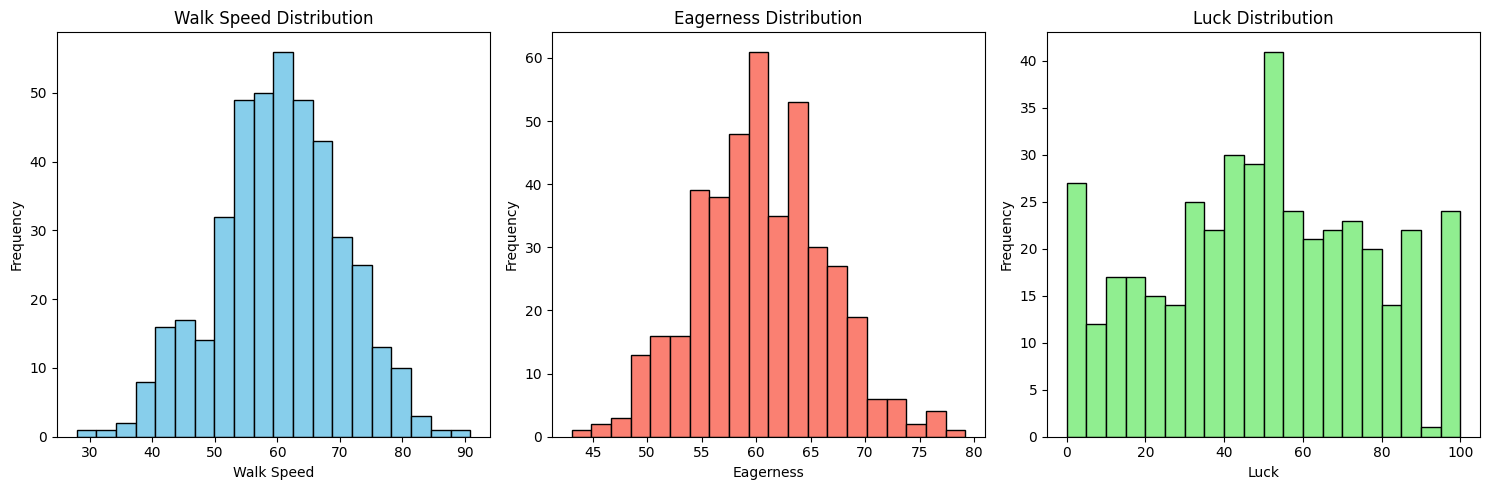

In [9]:
herd = load_cows_from_file("cows.txt")
walk_speeds = [cow.walk_speed for cow in herd]
eagernesses = [cow.eagerness for cow in herd]
lucks = [cow.luck for cow in herd]

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(walk_speeds, bins=20, color='skyblue', edgecolor='black')
plt.title('Walk Speed Distribution')
plt.xlabel('Walk Speed')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(eagernesses, bins=20, color='salmon', edgecolor='black')
plt.title('Eagerness Distribution')
plt.xlabel('Eagerness')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(lucks, bins=20, color='lightgreen', edgecolor='black')
plt.title('Luck Distribution')
plt.xlabel('Luck')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



Defining the Paddock

In [21]:
class Paddock:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.grid = np.zeros((height, width), dtype=int)  # Initialize paddock grid

    def place_cow(self, cow):
        x, y = cow.position
        self.grid[y, x] = cow.number  # Mark the cell with the cow's number

    def remove_cow(self, cow):
        x, y = cow.position
        self.grid[y, x] = 0  # Mark the cell as unoccupied by a cow

    def update_positions(self, herd, target, arrived, frame_number, iteration):
        new_positions = set()
        
        target_x, target_y = target
        herd.sort(key=lambda cow: abs(cow.position[0] - target_x) + abs(cow.position[1] - target_y))
        
          # Track new positions for each cow
        for cow in herd[:]:  # Use a slice to iterate over a copy of the herd
            self.remove_cow(cow)  # Remove current position
            old_position = cow.position  # Store old position
            
            # Try to move cow towards the target
            cow.move_towards(target, self.width, self.height)
            new_position = cow.position
            
            # Check if the new position is already occupied or if it's in new_positions
            if (self.grid[new_position[1], new_position[0]] == 0) and (new_position not in new_positions):
                new_positions.add(new_position)  # Mark this new position as occupied
                if new_position[0] <= 5 and new_position[1] == 0:
                    arrived.append(cow)  # Add to the arrived list
                    herd.remove(cow)  # Remove from the herd
                else:
                    self.place_cow(cow)  # Update new position
            else:
                cow.position = old_position  # Revert to old position if new position is occupied
                self.place_cow(cow)  # Place the cow back at the old position
        
        # Save the current frame
        self.save_frame(frame_number, iteration)

    def save_frame(self, frame_number, iteration):
        grid_str = "\n".join(" ".join(map(str, row)) for row in self.grid)
        with open(f"paddock_frames_{iteration}.txt", "a") as file:
            file.write(f"Frame {frame_number}:\n{grid_str}\n\n")
        #print(f"Saved frame {frame_number}")

    def display(self):
        print(self.grid)

In [11]:
def cow_drop(paddock, herd):
    occupied_positions = set()
    for cow in herd:
        x, y = cow.calculate_starting_position(paddock.width, paddock.height)
        
        if (x, y) in occupied_positions:
            found_position = False
            for dx in range(-1,1):
                for dy in range(-1,1):
                    new_x, new_y = x + dx, y + dy
                    if 0 <= new_x < paddock.width and 0 <= new_y < paddock.height:
                        if (new_x, new_y) not in occupied_positions:
                            x, y = new_x, new_y
                            found_position = True
                            break
                if found_position:
                    break
        
        if (x, y) in occupied_positions:
            while (x, y) in occupied_positions:
                x = random.randint(0, paddock.width - 1)
                y = random.randint(0, paddock.height -1)
       
        cow.position = (x, y)
        paddock.place_cow(cow)
        occupied_positions.add((x, y))

    return paddock

       


In [12]:
paddock = Paddock(25,50)

cow_drop(paddock,herd)

paddock.display()

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0 399   0 ...   0   0   0]]


In [13]:
def read_frames(filename="paddock_frames.txt"):
    frames = []
    current_frame = []

    with open(filename, "r") as file:
        for line in file:
            if line.startswith("Frame"):
                if current_frame:
                    frames.append(np.array(current_frame))
                    current_frame = []
            
            else:
                if line.strip():
                    current_frame.append(list(map(int, line.strip().split())))
        
        if current_frame:
            frames.append(np.array(current_frame))

    return frames


In [14]:

def animate_paddock(frames):
    fig, ax = plt.subplots()
    ax.set_title("Paddock Simulation")
    
    def update(frame):
        ax.clear()
        ax.imshow(frame, cmap="Greys", interpolation="none")
        ax.set_title("Paddock Simulation")
    
    ani = animation.FuncAnimation(fig, update, frames=frames, repeat=False)
    return ani



In [15]:
def display_frames_as_subplots(frames, subplot_cols=5):
    """
    Display each frame in a series of subplots.
    
    Args:
        frames (list of np.ndarray): List of frames to display.
        subplot_cols (int): Number of columns in the subplot grid. Defaults to 5.
    """
    num_frames = len(frames)
    subplot_rows = (num_frames + subplot_cols - 1) // subplot_cols  # Calculate the number of rows needed

    fig, axes = plt.subplots(subplot_rows, subplot_cols, figsize=(15, 3 * subplot_rows))
    axes = axes.flatten()  # Flatten the array of axes

    for i, ax in enumerate(axes):
        if i < num_frames:
            ax.imshow(frames[i], cmap="Greys", interpolation="none")
            ax.set_title(f"Frame {i+1}")
        else:
            ax.axis('off')  # Hide any unused subplots

    plt.tight_layout()
    plt.show()

In [16]:
frames = read_frames("paddock_frames.txt")
display_frames_as_subplots(frames)

FileNotFoundError: [Errno 2] No such file or directory: 'paddock_frames.txt'

In [64]:
def main():
    paddock_width = 25
    paddock_height = 50
    iterations = 100
    herd = load_cows_from_file("cows.txt")
    
    for iteration in range(iterations):
        paddock = Paddock(paddock_width, paddock_height)
        
        arrived = []
        
        cow_drop(paddock, herd)
        
        target = (random.randint(0, 5), 0)
        frame_number = 0
        
        open(f"paddock_frames_{iteration}.txt", "w").close()
        
        with tqdm(total=len(herd), desc=f"Moving cows iteration {iteration + 1}") as pbar:
            while herd:
                paddock.update_positions(herd, target, arrived, frame_number, iteration)
                frame_number += 1
                pbar.update(len(arrived) - pbar.n)
                #print(f"Arrived cows: {[cow.name for cow in arrived]}")

               
        if iteration == 0:
            herd = load_cows_from_file("cows.txt")

        else:
            herd = load_cows_from_file(f"cows_after_iteration_{iteration-1}.txt")

        average_walk_speed = sum(cow.walk_speed for cow in herd) / len(herd)
        print(average_walk_speed)
        update_walk_speed(herd, arrived, average_walk_speed)
        update_eagerness(herd)

        save_cows_to_file(arrived, f"cow_arrival_iteration_{iteration}.txt")
        
        save_cows_to_file(herd, f"cows_after_iteration_{iteration}.txt")

In [68]:

if __name__ == "__main__":
    main()

Moving cows iteration 1:   0%|          | 0/420 [00:00<?, ?it/s]

Moving cows iteration 1: 100%|██████████| 420/420 [00:00<00:00, 1034.90it/s]


60.29284990137313


Moving cows iteration 2: 100%|██████████| 420/420 [00:00<00:00, 970.11it/s] 


60.30000763324959


Moving cows iteration 3: 100%|██████████| 420/420 [00:00<00:00, 909.92it/s]


60.30261352795359


Moving cows iteration 4: 100%|██████████| 420/420 [00:00<00:00, 1208.13it/s]


60.2965654115167


Moving cows iteration 5: 100%|██████████| 420/420 [00:00<00:00, 1227.47it/s]


60.29447476879381


Moving cows iteration 6: 100%|██████████| 420/420 [00:00<00:00, 1009.81it/s]


60.300963044157456


Moving cows iteration 7: 100%|██████████| 420/420 [00:00<00:00, 1052.41it/s]


60.28808522881421


Moving cows iteration 8: 100%|██████████| 420/420 [00:00<00:00, 980.92it/s] 


60.27227909296463


Moving cows iteration 9: 100%|██████████| 420/420 [00:00<00:00, 1213.98it/s]


60.27512120294383


Moving cows iteration 10: 100%|██████████| 420/420 [00:00<00:00, 1297.96it/s]


60.26401768576745


Moving cows iteration 11: 100%|██████████| 420/420 [00:00<00:00, 939.32it/s]


60.2637014267553


Moving cows iteration 12: 100%|██████████| 420/420 [00:00<00:00, 1185.87it/s]


60.264370873749776


Moving cows iteration 13: 100%|██████████| 420/420 [00:00<00:00, 1259.70it/s]


60.246913409936134


Moving cows iteration 14: 100%|██████████| 420/420 [00:00<00:00, 1135.56it/s]


60.22867922904916


Moving cows iteration 15: 100%|██████████| 420/420 [00:00<00:00, 999.03it/s] 


60.19206484395273


Moving cows iteration 16: 100%|██████████| 420/420 [00:00<00:00, 1214.97it/s]


60.18712943405004


Moving cows iteration 17: 100%|██████████| 420/420 [00:00<00:00, 1085.18it/s]


60.183083189547084


Moving cows iteration 18: 100%|██████████| 420/420 [00:00<00:00, 1126.10it/s]


60.17654595438919


Moving cows iteration 19: 100%|██████████| 420/420 [00:00<00:00, 1043.28it/s]


60.18054387582877


Moving cows iteration 20: 100%|██████████| 420/420 [00:00<00:00, 1118.47it/s]


60.15929434933519


Moving cows iteration 21: 100%|██████████| 420/420 [00:00<00:00, 904.24it/s]


60.16718310609065


Moving cows iteration 22: 100%|██████████| 420/420 [00:00<00:00, 1081.99it/s]


60.165367190350295


Moving cows iteration 23: 100%|██████████| 420/420 [00:00<00:00, 1190.91it/s]


60.17009849935637


Moving cows iteration 24: 100%|██████████| 420/420 [00:00<00:00, 1118.61it/s]


60.16739358924682


Moving cows iteration 25: 100%|██████████| 420/420 [00:00<00:00, 1051.51it/s]


60.16795550039635


Moving cows iteration 26: 100%|██████████| 420/420 [00:00<00:00, 1007.81it/s]


60.14042575600221


Moving cows iteration 27: 100%|██████████| 420/420 [00:00<00:00, 838.70it/s]


60.12769102961008


Moving cows iteration 28: 100%|██████████| 420/420 [00:00<00:00, 1020.35it/s]


60.117521037001026


Moving cows iteration 29: 100%|██████████| 420/420 [00:00<00:00, 1078.21it/s]


60.082228320850184


Moving cows iteration 30: 100%|██████████| 420/420 [00:00<00:00, 1228.45it/s]


60.05715956987566


Moving cows iteration 31: 100%|██████████| 420/420 [00:00<00:00, 1157.46it/s]


60.01409949342885


Moving cows iteration 32: 100%|██████████| 420/420 [00:00<00:00, 1234.26it/s]


59.99010679355183


Moving cows iteration 33: 100%|██████████| 420/420 [00:00<00:00, 1002.79it/s]


59.95101472167723


Moving cows iteration 34: 100%|██████████| 420/420 [00:00<00:00, 1025.34it/s]


59.918584166171875


Moving cows iteration 35: 100%|██████████| 420/420 [00:00<00:00, 1290.31it/s]


59.900705880865964


Moving cows iteration 36: 100%|██████████| 420/420 [00:00<00:00, 1155.29it/s]


59.87275243387214


Moving cows iteration 37: 100%|██████████| 420/420 [00:00<00:00, 1287.36it/s]


59.839539856071944


Moving cows iteration 38: 100%|██████████| 420/420 [00:00<00:00, 1130.13it/s]


59.810686291814854


Moving cows iteration 39: 100%|██████████| 420/420 [00:00<00:00, 1051.01it/s]


59.79180096267465


Moving cows iteration 40: 100%|██████████| 420/420 [00:00<00:00, 1302.48it/s]


59.73798745255405


Moving cows iteration 41: 100%|██████████| 420/420 [00:00<00:00, 1110.77it/s]


59.711125022481454


Moving cows iteration 42: 100%|██████████| 420/420 [00:00<00:00, 1071.85it/s]


59.686257426565845


Moving cows iteration 43: 100%|██████████| 420/420 [00:00<00:00, 1276.65it/s]


59.6552442003146


Moving cows iteration 44: 100%|██████████| 420/420 [00:00<00:00, 1228.64it/s]


59.62859856187512


Moving cows iteration 45: 100%|██████████| 420/420 [00:00<00:00, 1149.91it/s]


59.61499196807598


Moving cows iteration 46: 100%|██████████| 420/420 [00:00<00:00, 1035.49it/s]


59.599171213258764


Moving cows iteration 47: 100%|██████████| 420/420 [00:00<00:00, 1103.78it/s]


59.55846248283701


Moving cows iteration 48: 100%|██████████| 420/420 [00:00<00:00, 718.47it/s]


59.52592352314671


Moving cows iteration 49: 100%|██████████| 420/420 [00:00<00:00, 1155.77it/s]


59.500602106643115


Moving cows iteration 50: 100%|██████████| 420/420 [00:00<00:00, 1008.44it/s]


59.493138917497056


Moving cows iteration 51: 100%|██████████| 420/420 [00:00<00:00, 1291.43it/s]


59.47977532810055


Moving cows iteration 52: 100%|██████████| 420/420 [00:00<00:00, 955.54it/s] 


59.46360900223965


Moving cows iteration 53: 100%|██████████| 420/420 [00:00<00:00, 1157.72it/s]


59.46413146362


Moving cows iteration 54: 100%|██████████| 420/420 [00:00<00:00, 1046.67it/s]


59.434014188710904


Moving cows iteration 55: 100%|██████████| 420/420 [00:00<00:00, 669.23it/s] 


59.42020525730138


Moving cows iteration 56: 100%|██████████| 420/420 [00:00<00:00, 1072.68it/s]


59.39584443011011


Moving cows iteration 57: 100%|██████████| 420/420 [00:00<00:00, 701.33it/s]


59.39356272196085


Moving cows iteration 58: 100%|██████████| 420/420 [00:00<00:00, 785.83it/s]


59.40673344581437


Moving cows iteration 59: 100%|██████████| 420/420 [00:00<00:00, 1097.51it/s]


59.3918118467711


Moving cows iteration 60: 100%|██████████| 420/420 [00:00<00:00, 1211.10it/s]


59.37535452948115


Moving cows iteration 61: 100%|██████████| 420/420 [00:00<00:00, 1203.45it/s]


59.369081627933674


Moving cows iteration 62: 100%|██████████| 420/420 [00:00<00:00, 1193.71it/s]


59.36527064357527


Moving cows iteration 63: 100%|██████████| 420/420 [00:00<00:00, 1275.90it/s]


59.36825616997058


Moving cows iteration 64: 100%|██████████| 420/420 [00:00<00:00, 953.13it/s] 


59.36023114257702


Moving cows iteration 65: 100%|██████████| 420/420 [00:00<00:00, 1227.39it/s]


59.349669563020136


Moving cows iteration 66: 100%|██████████| 420/420 [00:00<00:00, 1311.38it/s]


59.350321323530835


Moving cows iteration 67: 100%|██████████| 420/420 [00:00<00:00, 1104.36it/s]


59.34007434612671


Moving cows iteration 68: 100%|██████████| 420/420 [00:00<00:00, 1186.73it/s]


59.34399560803969


Moving cows iteration 69: 100%|██████████| 420/420 [00:00<00:00, 1240.70it/s]


59.341775858908285


Moving cows iteration 70: 100%|██████████| 420/420 [00:00<00:00, 897.85it/s]


59.347046424569754


Moving cows iteration 71: 100%|██████████| 420/420 [00:00<00:00, 1263.21it/s]


59.36428883787521


Moving cows iteration 72: 100%|██████████| 420/420 [00:00<00:00, 921.21it/s]


59.36507378953104


Moving cows iteration 73: 100%|██████████| 420/420 [00:00<00:00, 1300.97it/s]


59.38993593389311


Moving cows iteration 74: 100%|██████████| 420/420 [00:00<00:00, 1165.34it/s]


59.38816560092893


Moving cows iteration 75: 100%|██████████| 420/420 [00:00<00:00, 1118.89it/s]


59.38482090941549


Moving cows iteration 76: 100%|██████████| 420/420 [00:00<00:00, 990.53it/s] 


59.398147596304376


Moving cows iteration 77: 100%|██████████| 420/420 [00:00<00:00, 1250.10it/s]


59.40093005934633


Moving cows iteration 78: 100%|██████████| 420/420 [00:00<00:00, 1096.54it/s]


59.41019812387918


Moving cows iteration 79: 100%|██████████| 420/420 [00:00<00:00, 1160.66it/s]


59.42499118943853


Moving cows iteration 80: 100%|██████████| 420/420 [00:00<00:00, 1010.55it/s]


59.42343101993269


Moving cows iteration 81: 100%|██████████| 420/420 [00:00<00:00, 1247.23it/s]


59.42557482379054


Moving cows iteration 82: 100%|██████████| 420/420 [00:00<00:00, 938.12it/s]


59.42838217979194


Moving cows iteration 83: 100%|██████████| 420/420 [00:00<00:00, 1231.65it/s]


59.44143831824717


Moving cows iteration 84: 100%|██████████| 420/420 [00:00<00:00, 1248.71it/s]


59.44225026088759


Moving cows iteration 85: 100%|██████████| 420/420 [00:00<00:00, 1015.24it/s]


59.454834359179586


Moving cows iteration 86: 100%|██████████| 420/420 [00:00<00:00, 1229.38it/s]


59.4767573320139


Moving cows iteration 87: 100%|██████████| 420/420 [00:00<00:00, 1158.57it/s]


59.480645465198954


Moving cows iteration 88: 100%|██████████| 420/420 [00:00<00:00, 847.81it/s]


59.49500800969588


Moving cows iteration 89: 100%|██████████| 420/420 [00:00<00:00, 1143.75it/s]


59.52009506261462


Moving cows iteration 90: 100%|██████████| 420/420 [00:00<00:00, 1057.53it/s]


59.53529335103864


Moving cows iteration 91: 100%|██████████| 420/420 [00:00<00:00, 1081.30it/s]


59.572174234063404


Moving cows iteration 92: 100%|██████████| 420/420 [00:00<00:00, 1214.88it/s]


59.59919471459988


Moving cows iteration 93: 100%|██████████| 420/420 [00:00<00:00, 1066.86it/s]


59.621913615866724


Moving cows iteration 94: 100%|██████████| 420/420 [00:00<00:00, 834.31it/s]


59.64403497666008


Moving cows iteration 95: 100%|██████████| 420/420 [00:00<00:00, 1042.63it/s]


59.67663201743747


Moving cows iteration 96: 100%|██████████| 420/420 [00:00<00:00, 1136.86it/s]


59.68797504405898


Moving cows iteration 97: 100%|██████████| 420/420 [00:00<00:00, 1101.60it/s]


59.72397656095747


Moving cows iteration 98: 100%|██████████| 420/420 [00:00<00:00, 1132.11it/s]


59.743640029431276


Moving cows iteration 99: 100%|██████████| 420/420 [00:00<00:00, 1079.73it/s]


59.74841409475242


Moving cows iteration 100: 100%|██████████| 420/420 [00:00<00:00, 699.87it/s]

59.77689254051239


In [102]:
def load_cow_data_from_files(iterations):
    cow_data = {}
    
    for iteration in range(iterations):
        filename = f"cow_arrival_iteration_{iteration}.txt"
        position = 0
        with open(filename, "r") as file:
            for line in file:
                number, name, walk_speed, eagerness, luck = line.strip().split(',')
                number = int(number)
                walk_speed = float(walk_speed)
                eagerness = float(eagerness)
                position += 1 
                if number not in cow_data:
                    cow_data[number] = {'walk_speed': [], 'eagerness': [], 'position':[]}
                cow_data[number]['walk_speed'].append(walk_speed)
                cow_data[number]['eagerness'].append(eagerness)
                cow_data[number]['position'].append(position)
    sorted_cow_data = dict(sorted(cow_data.items()))  
    return sorted_cow_data

In [84]:
def plot_cow_data(cow_data):
    for cow_id, stats in cow_data.items():
        plt.figure(figsize=(12, 6))
        
        plt.subplot(1, 3, 1)
        plt.plot(stats['walk_speed'], label=f'Cow {cow_id}')
        plt.xlabel('Iteration')
        plt.ylabel('Walk Speed')
        plt.title('Walk Speed Over Iterations')
        plt.legend()
        
        plt.subplot(1, 3, 2)
        plt.plot(stats['eagerness'], label=f'Cow {cow_id}')
        plt.xlabel('Iteration')
        plt.ylabel('Eagerness')
        plt.title('Eagerness Over Iterations')
        plt.legend()

        plt.subplot(1, 3, 3)
        plt.plot(stats['position'], label=f'Cow {cow_id}')
        plt.xlabel('Iteration')
        plt.ylabel('Position')
        plt.title('Position Over Iterations')
        plt.legend()
        
        plt.suptitle(f'Cow {cow_id} - Walk Speed, Eagerness and Position Over Iterations')
        plt.show()

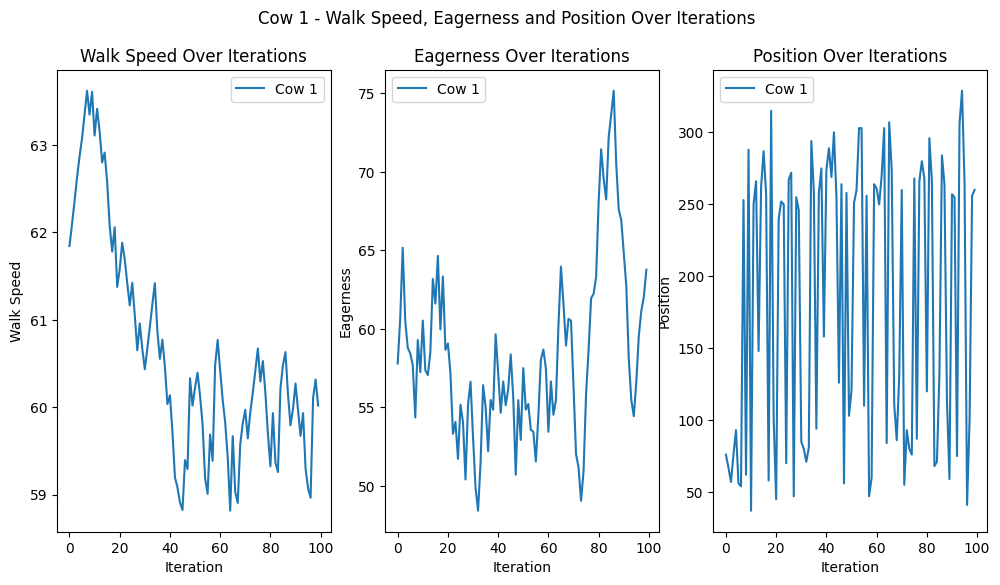

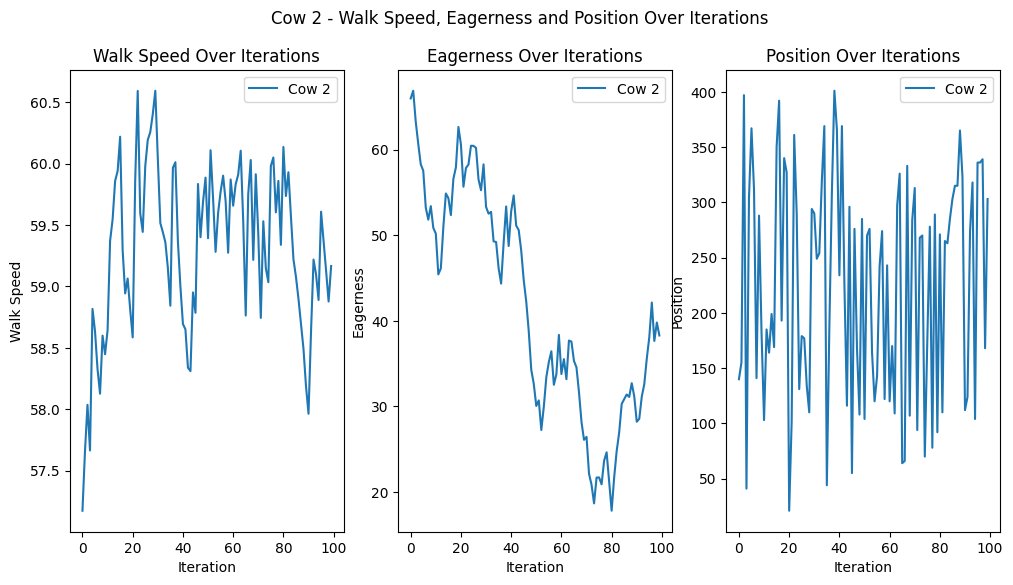

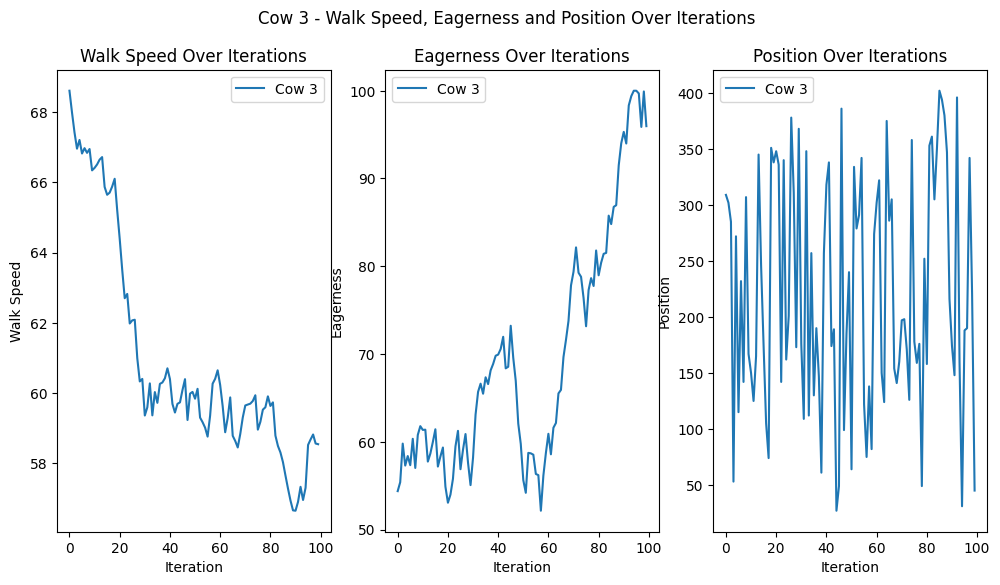

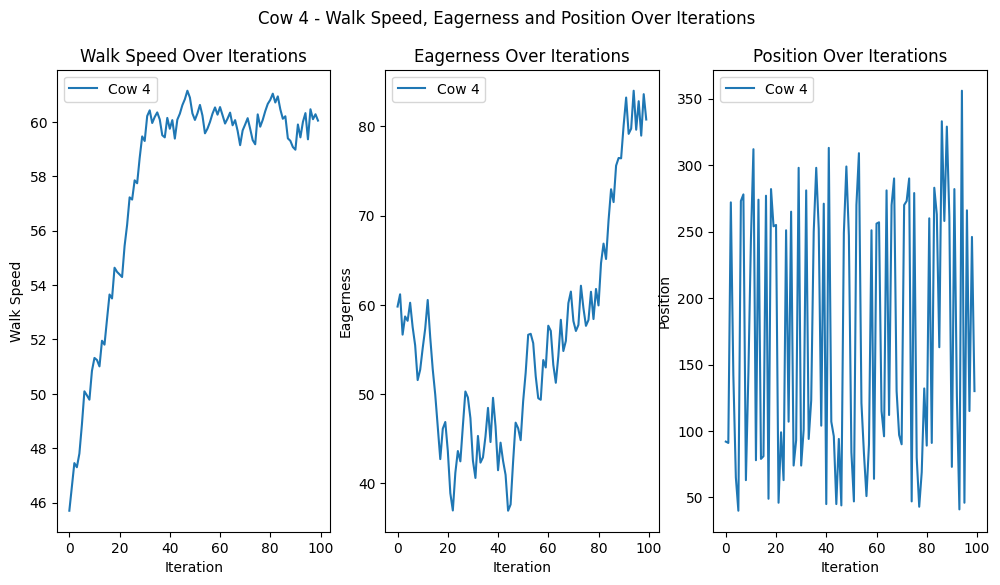

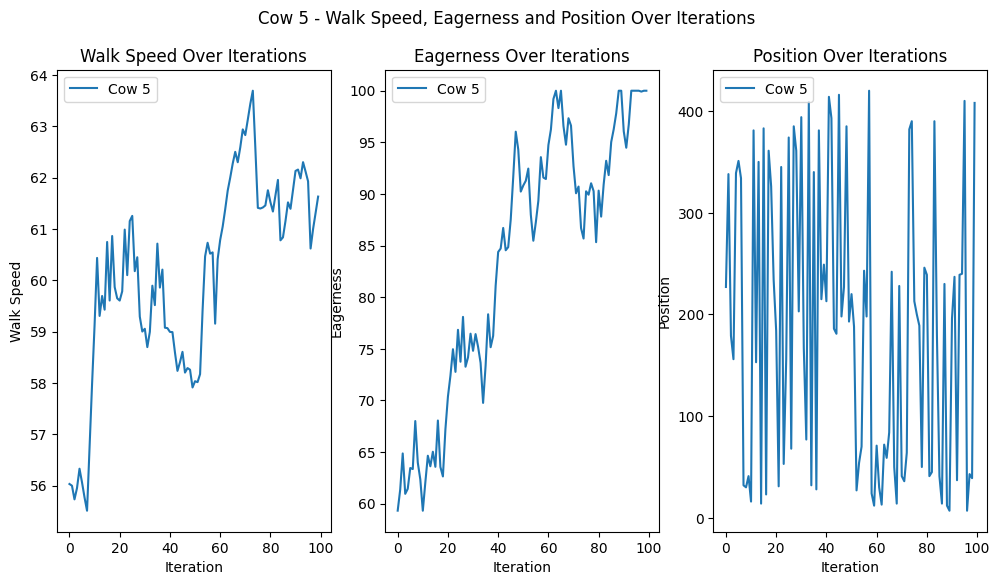

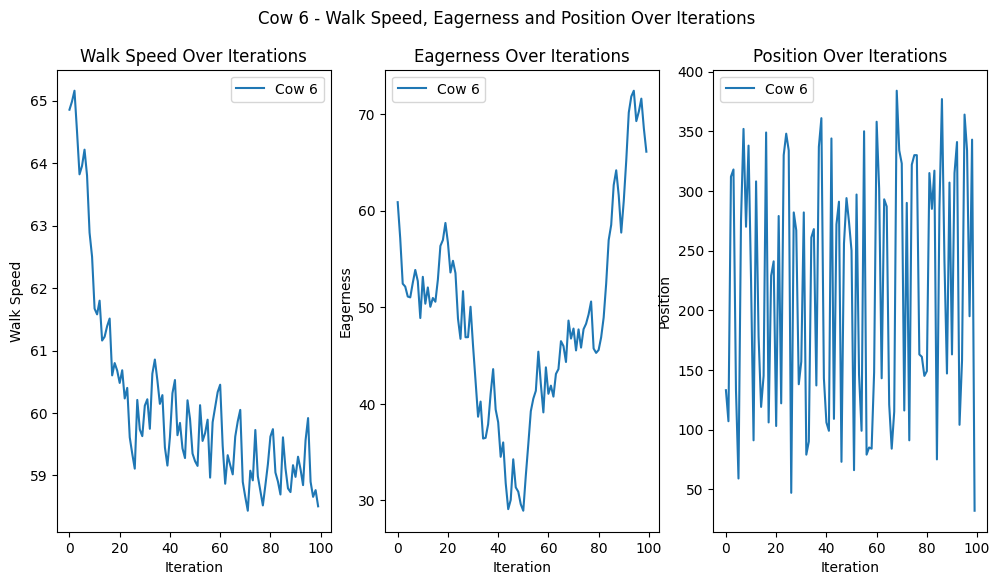

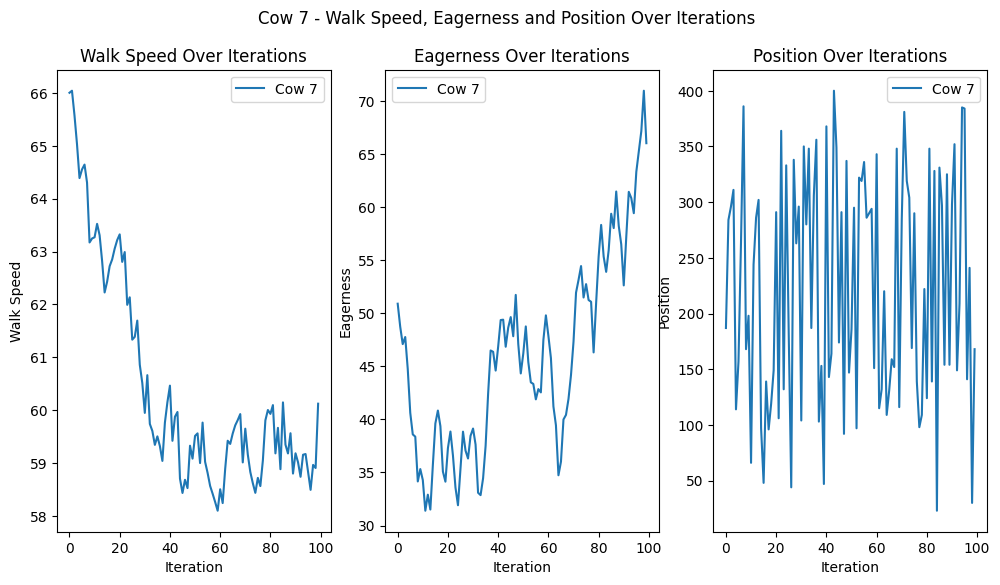

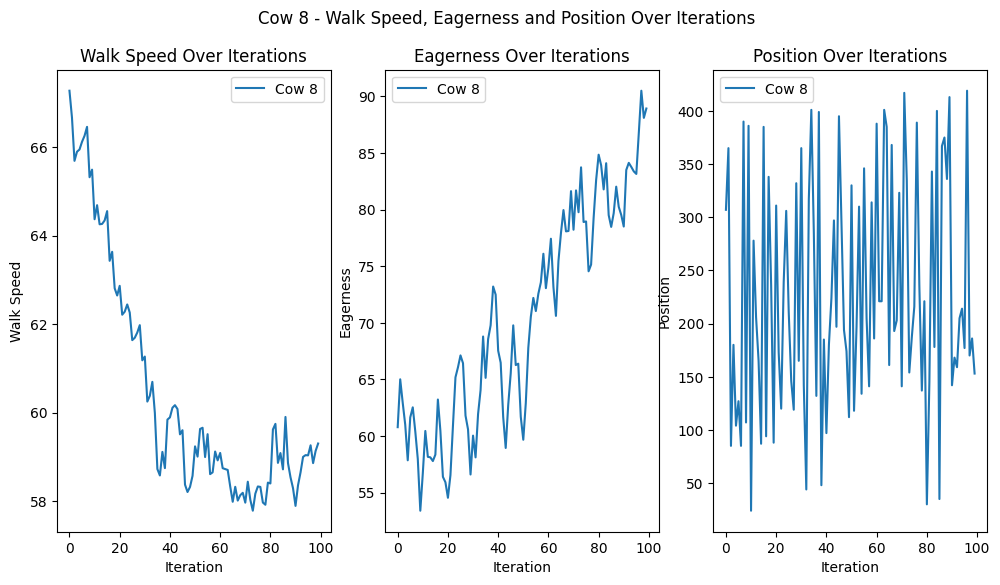

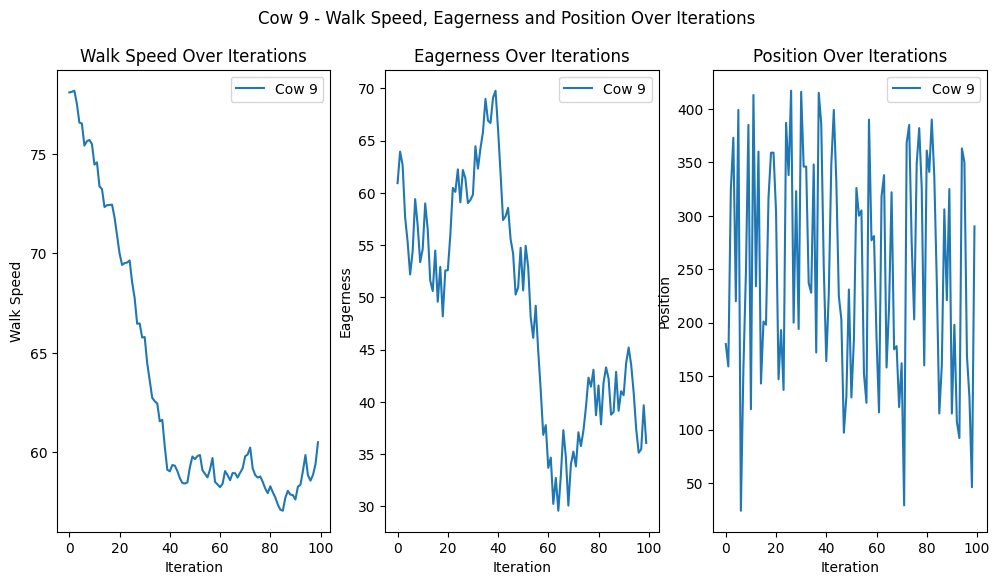

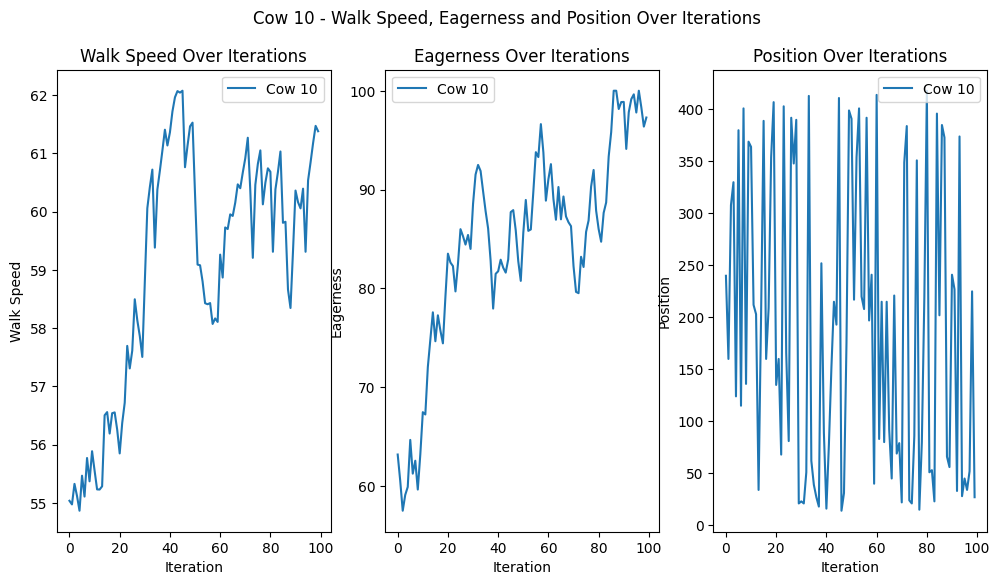

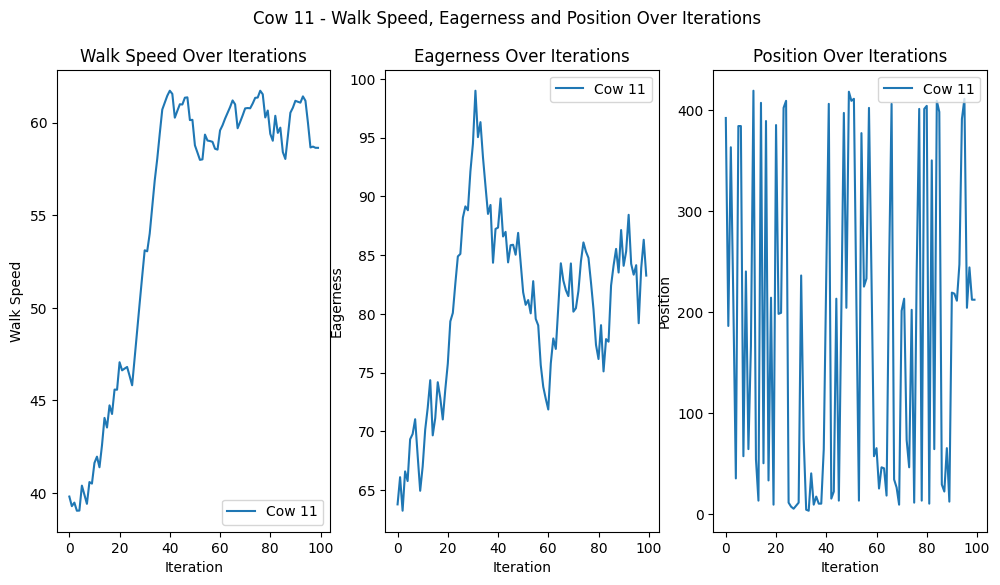

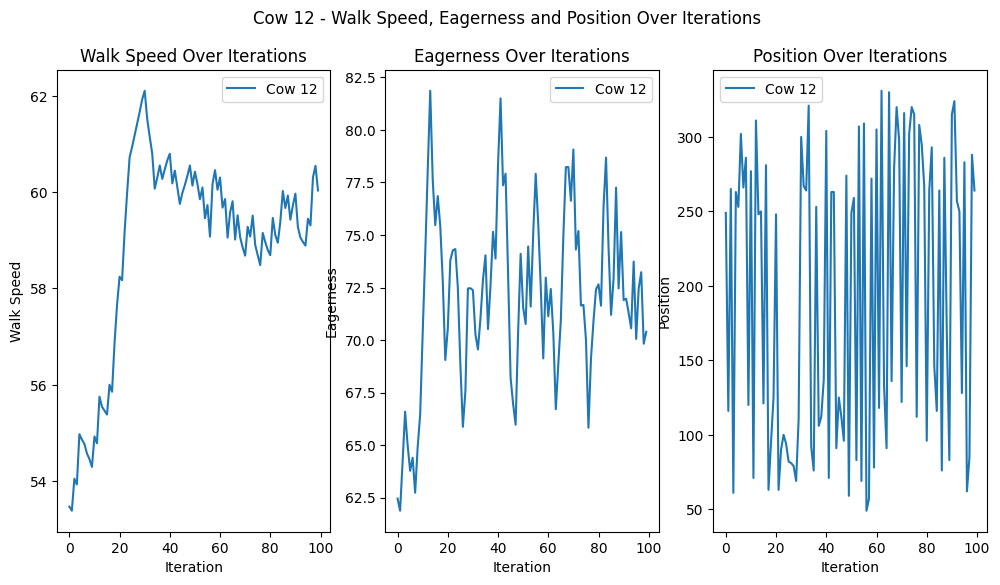

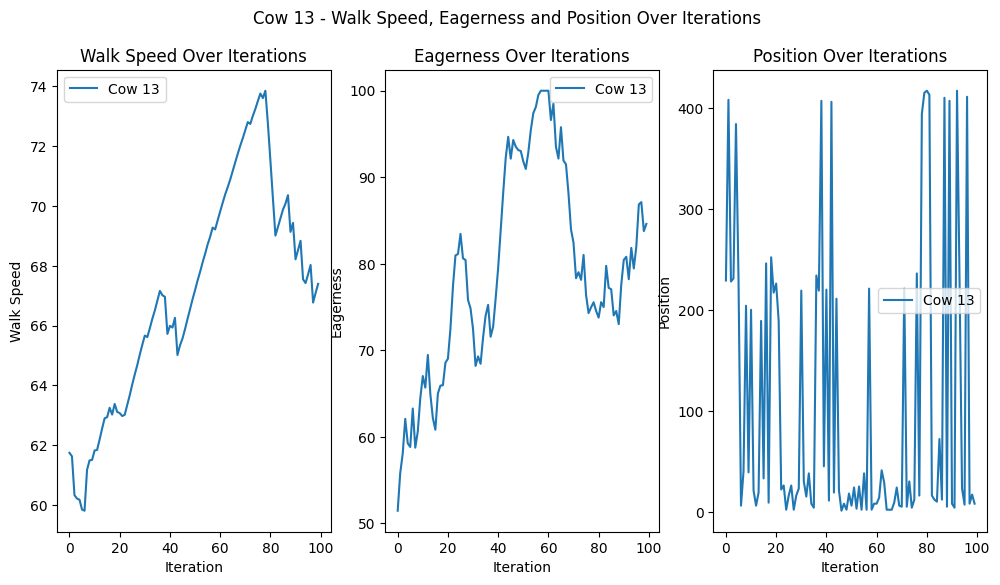

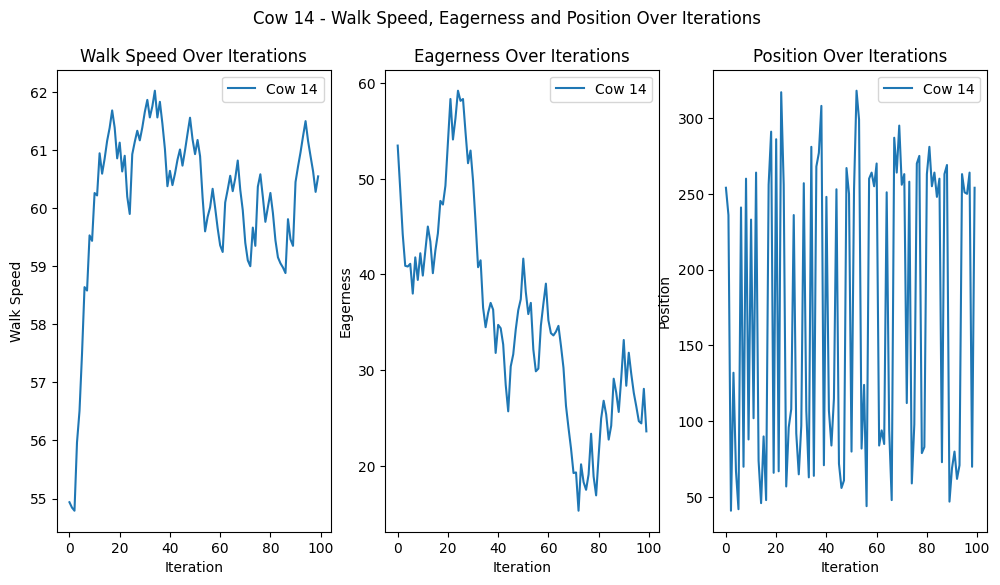

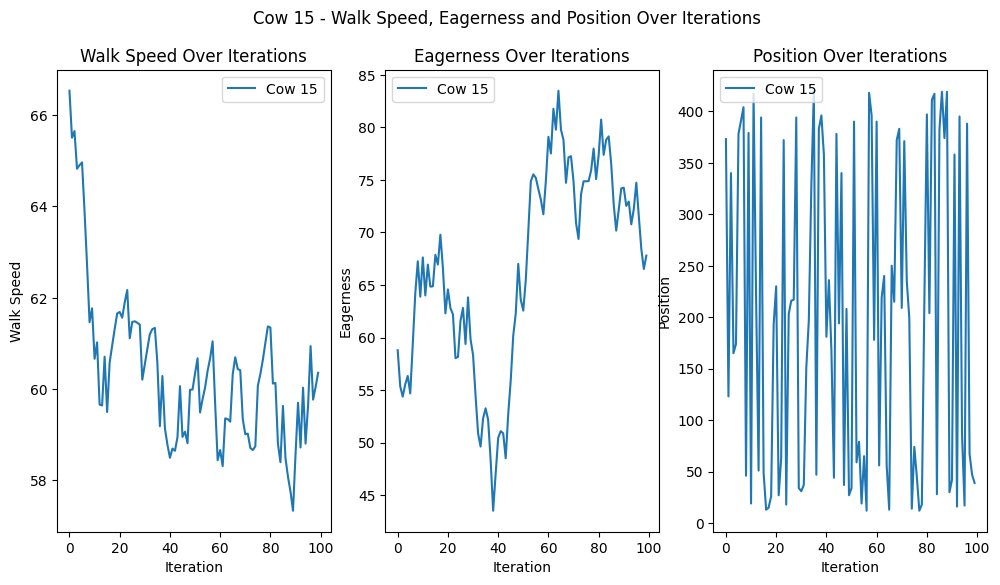

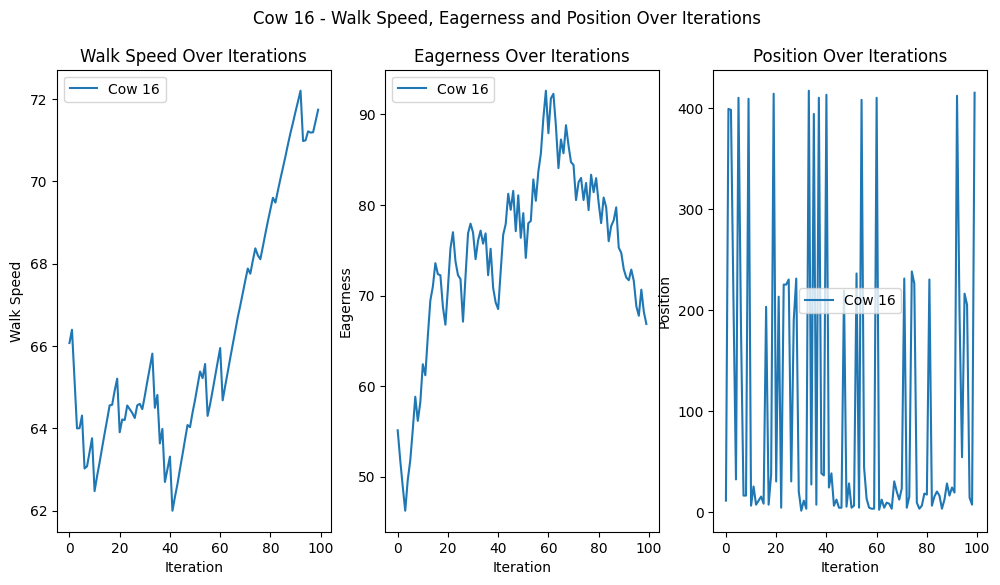

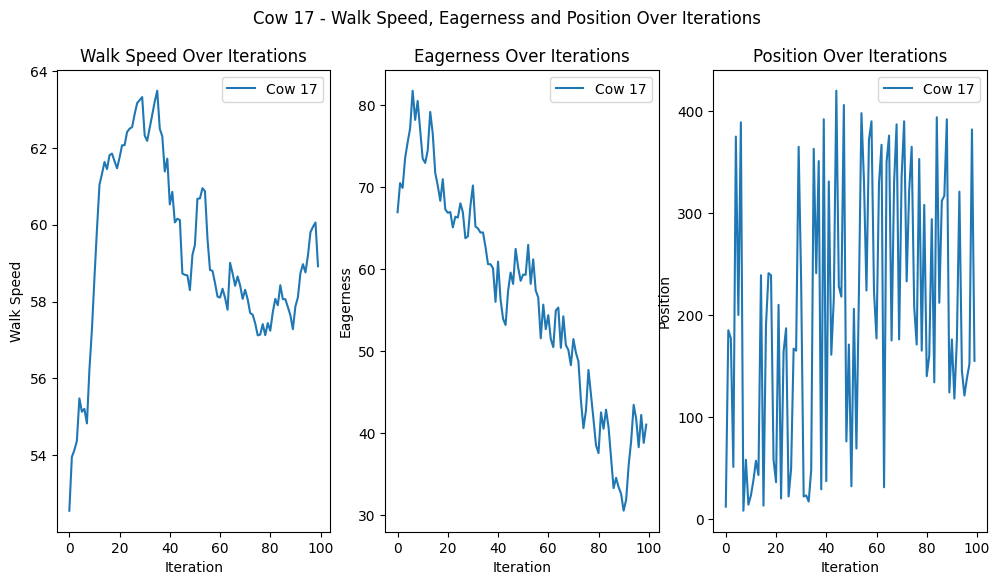

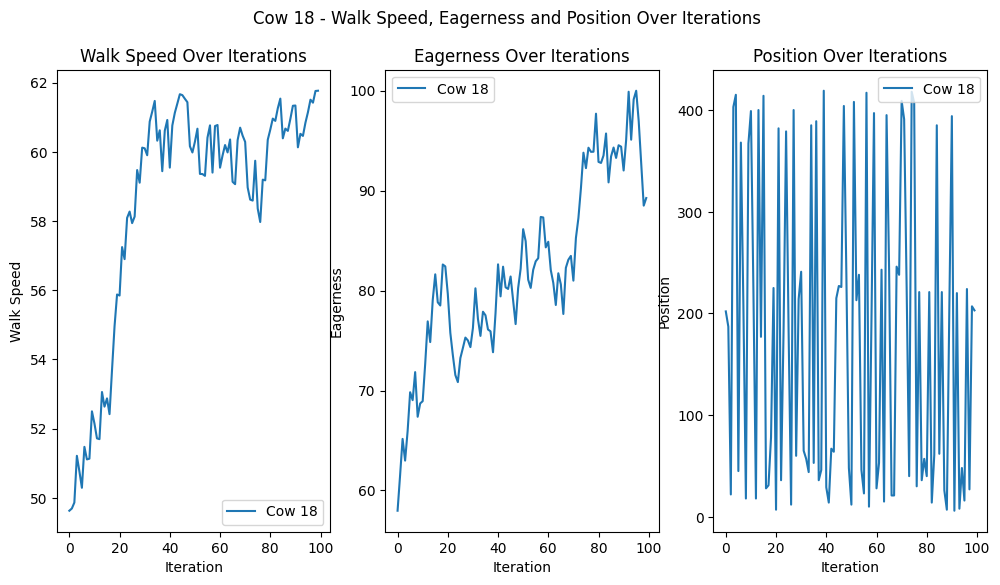

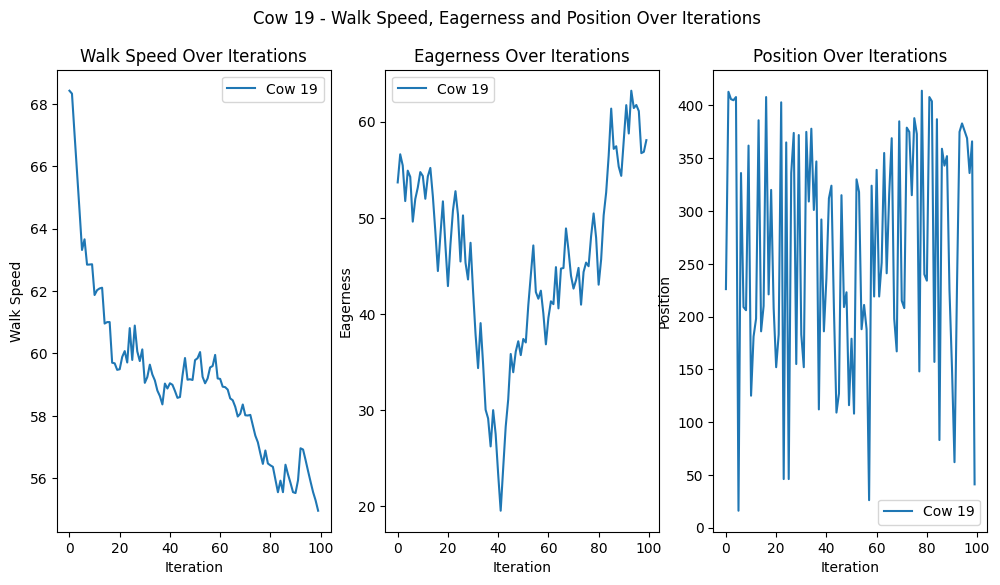

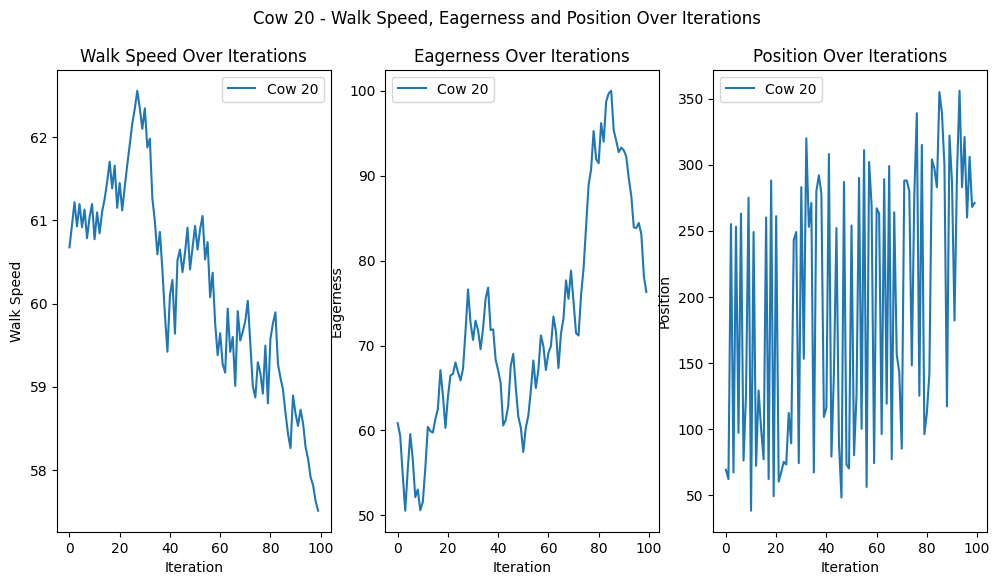

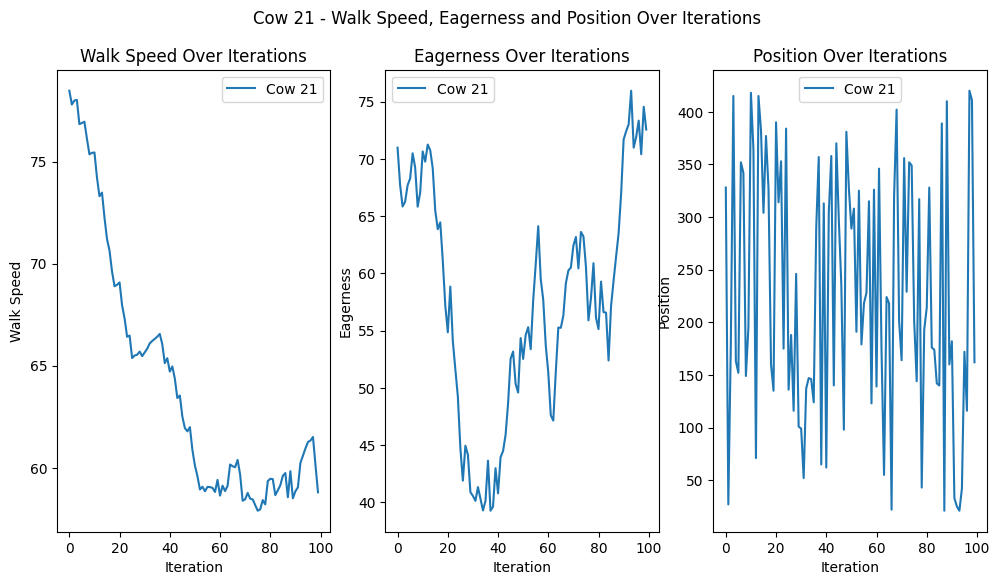

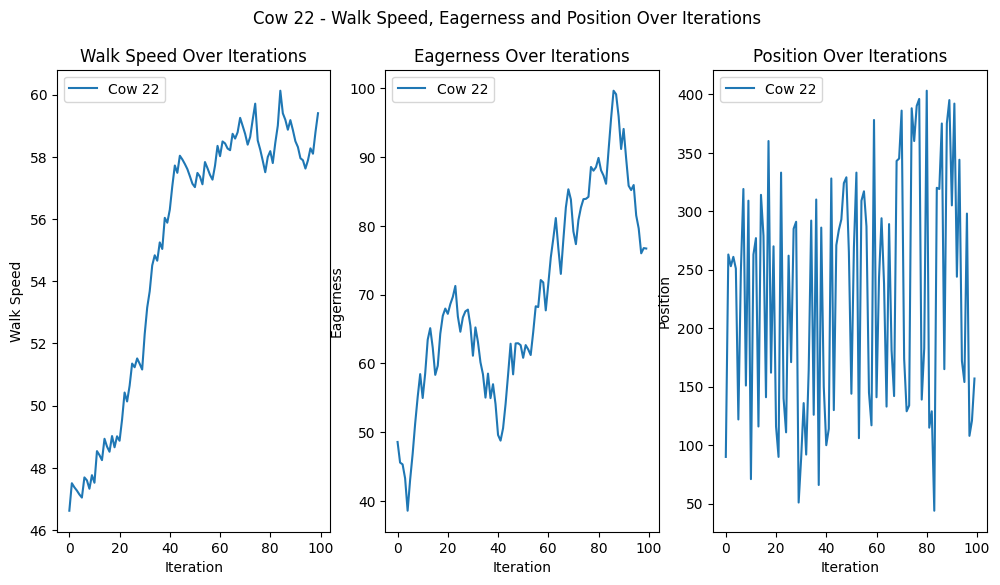

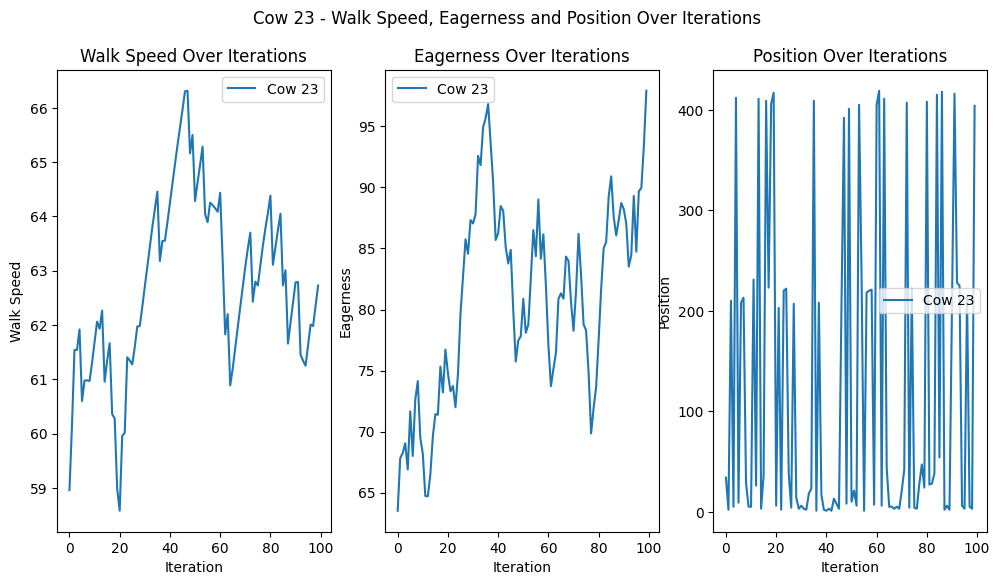

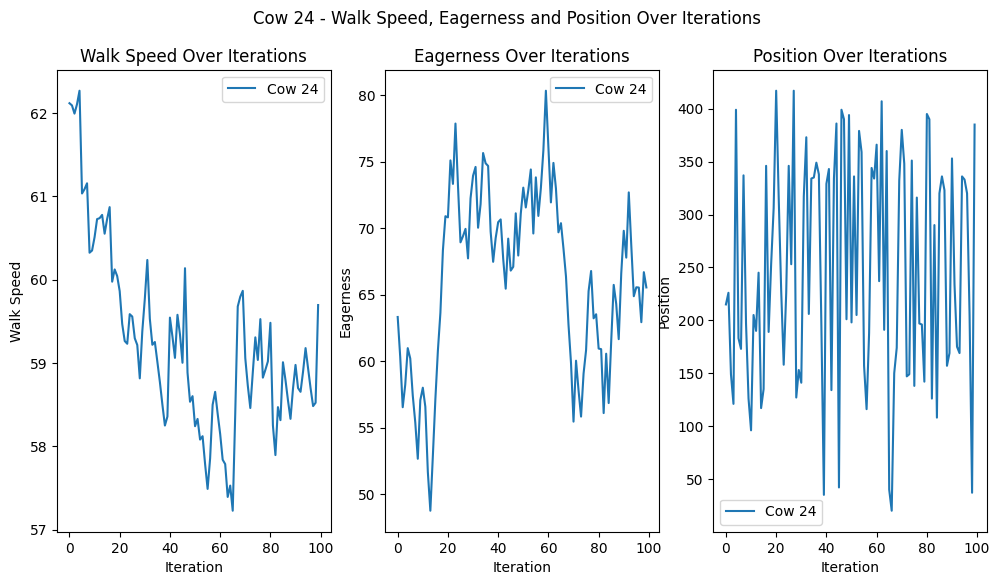

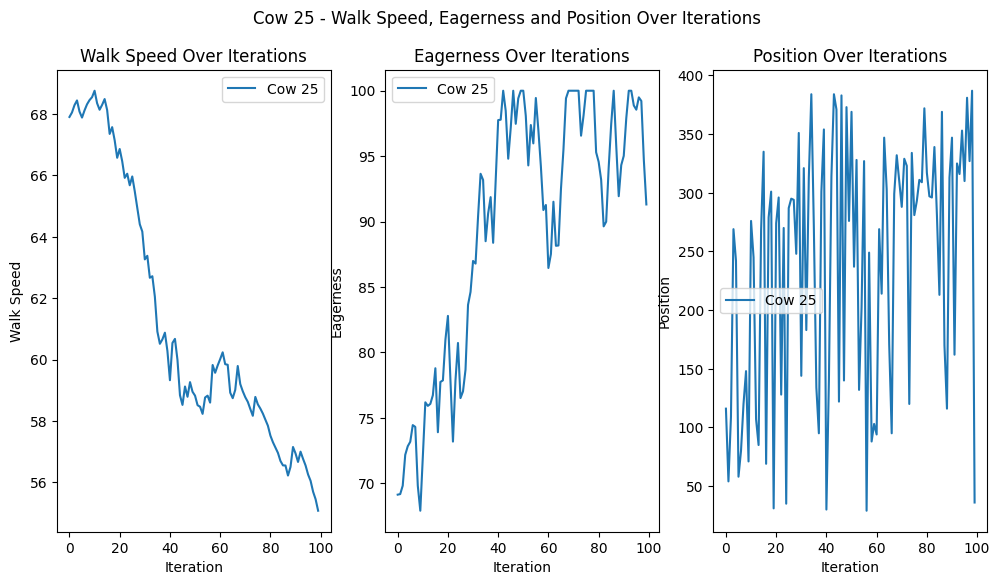

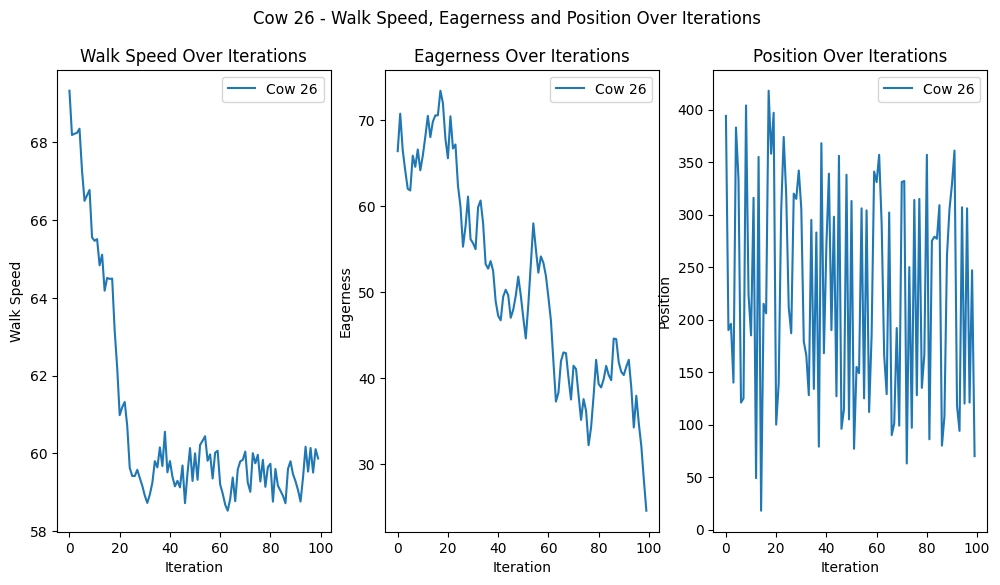

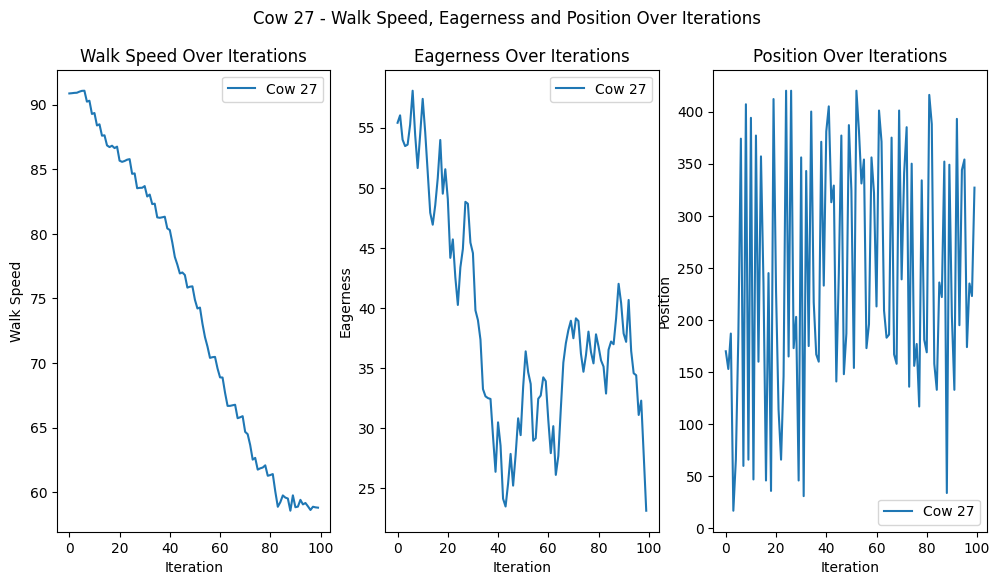

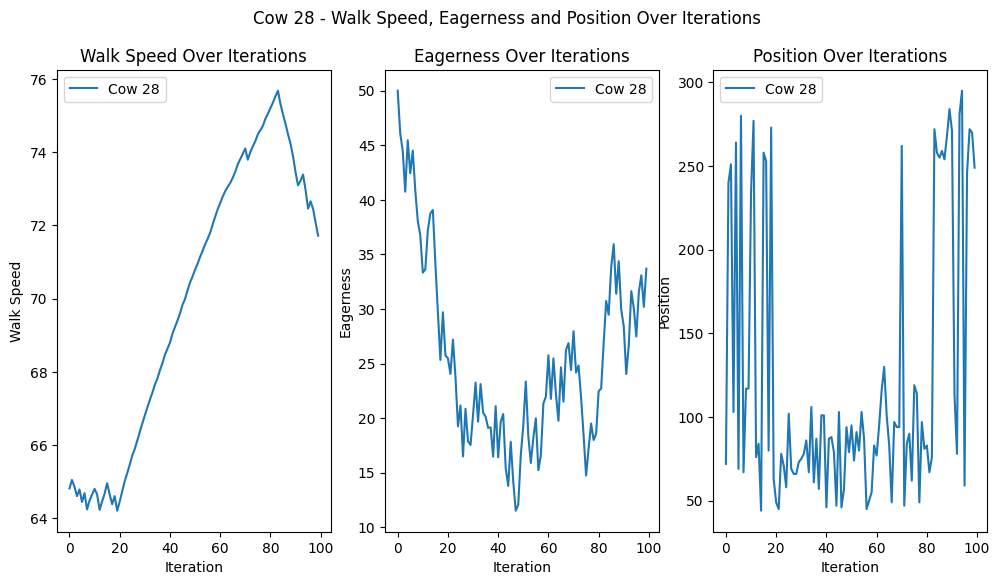

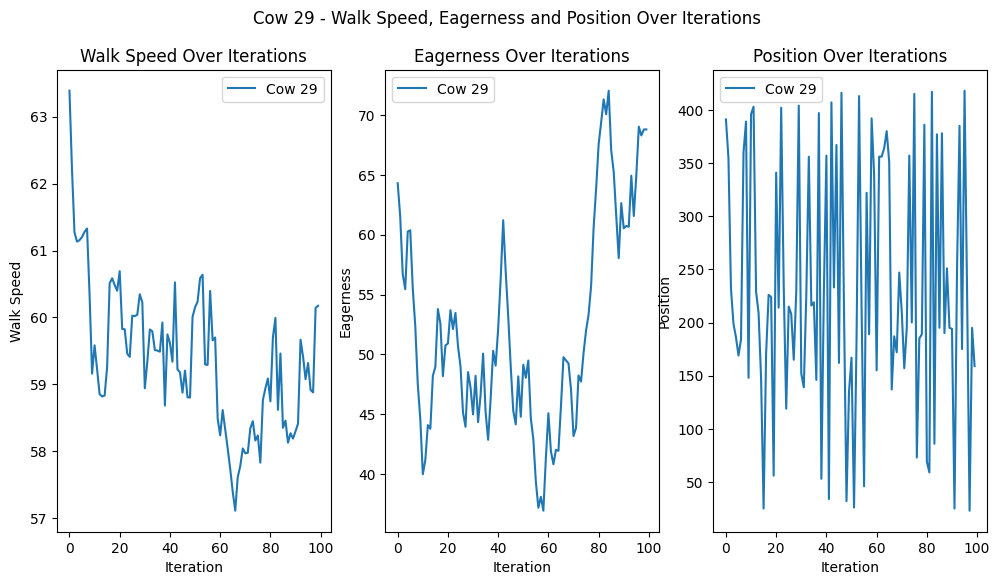

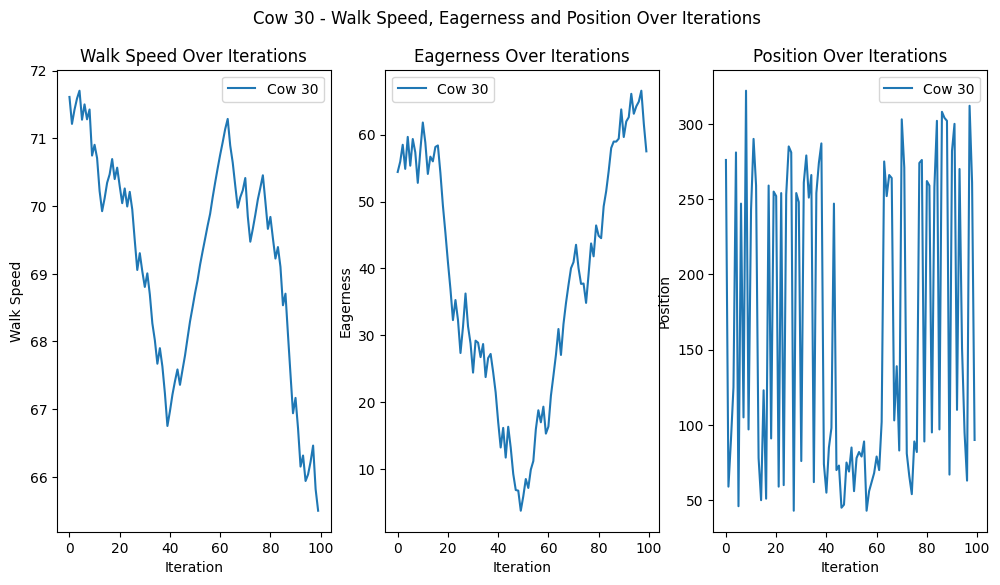

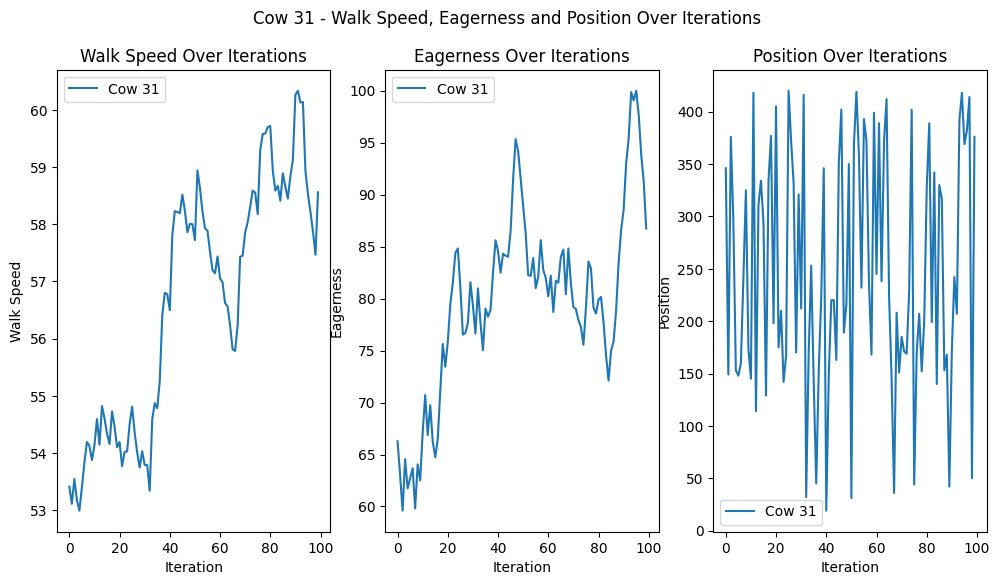

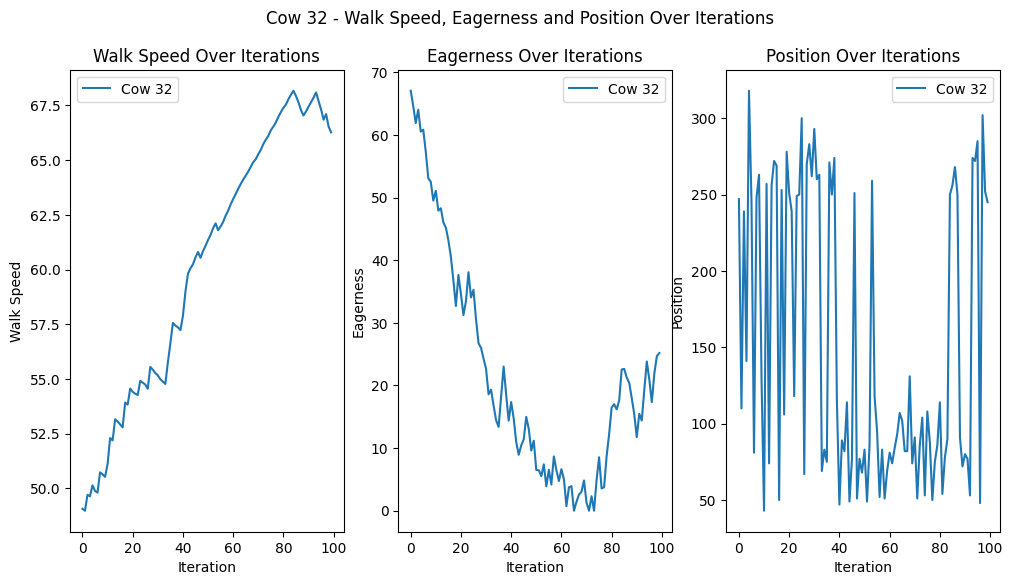

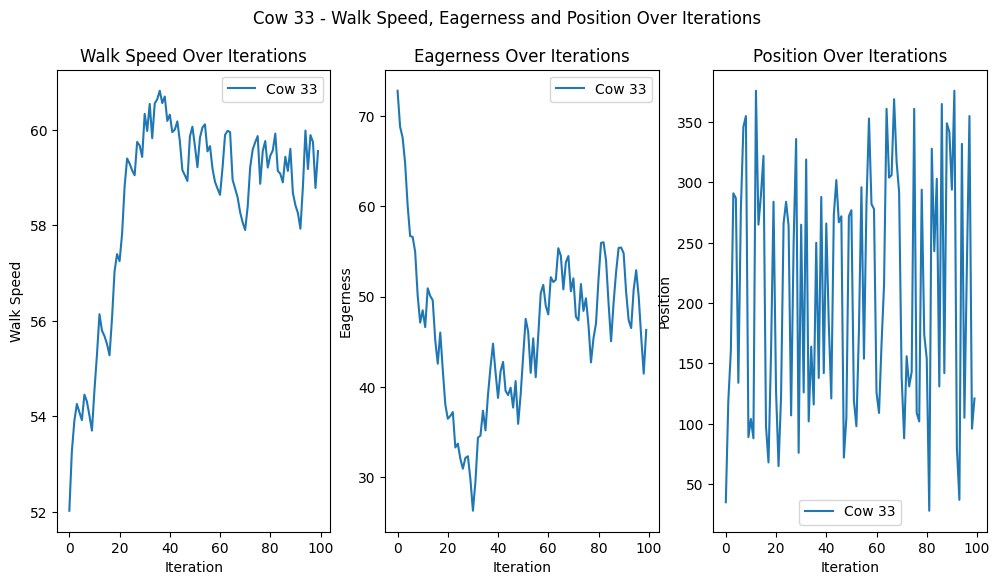

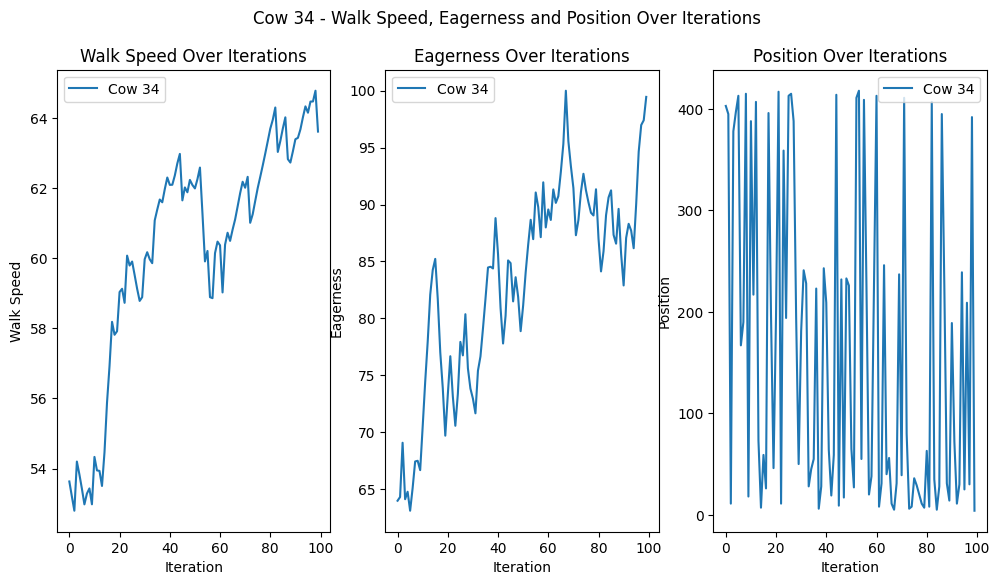

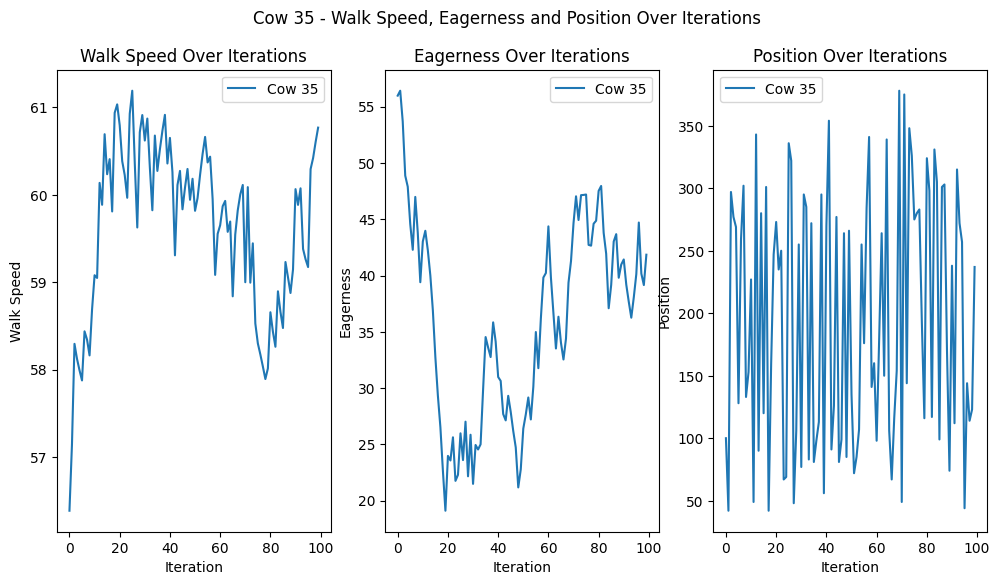

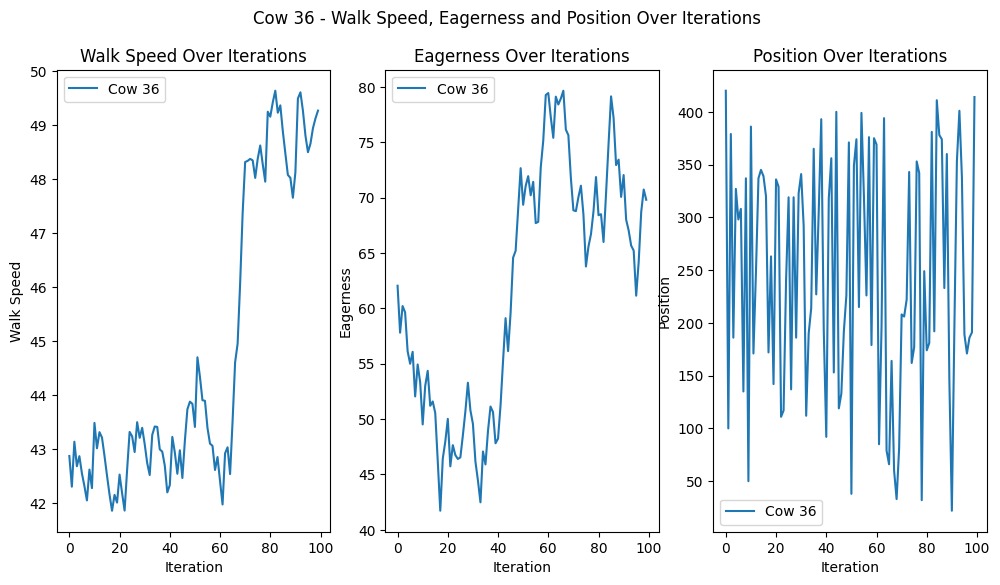

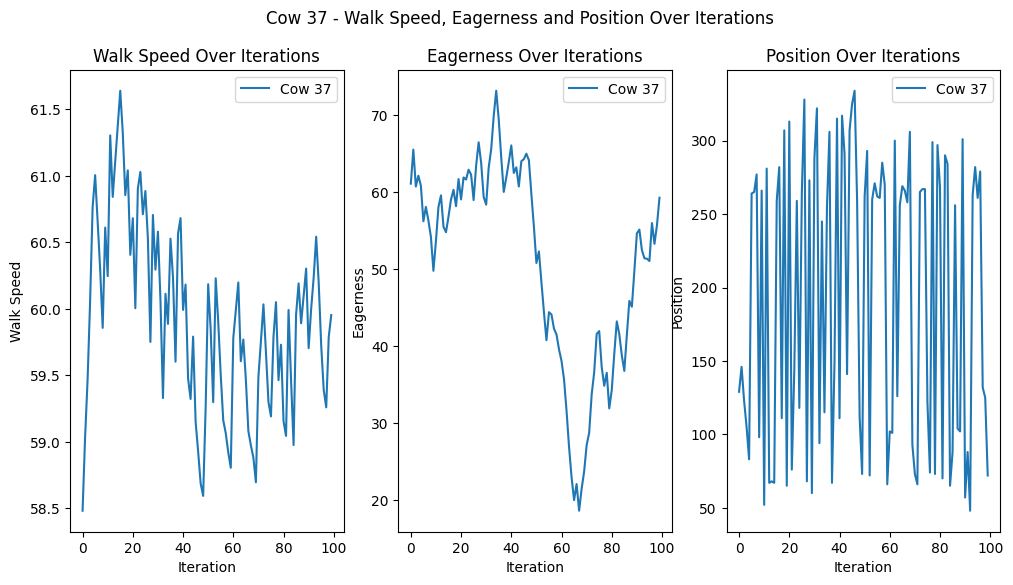

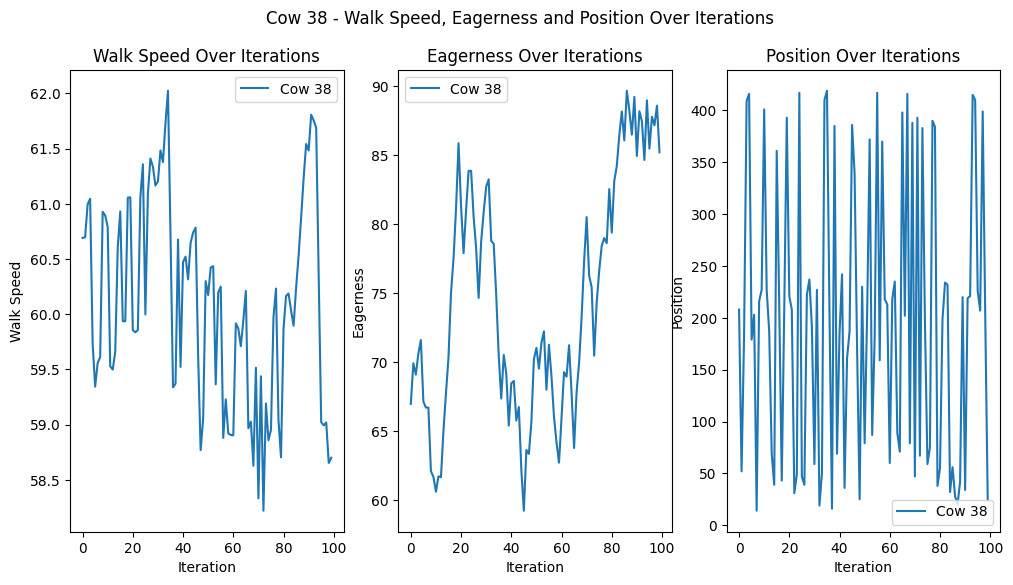

KeyboardInterrupt: 

In [103]:
iterations = 100
cow_data = load_cow_data_from_files(iterations)
plot_cow_data(cow_data)